In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyam
import seaborn
from scipy.optimize import fsolve, root, least_squares
import sklearn.decomposition
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
version_str = "v4"
output_dir = f"../output/{version_str}/fair/"
date_str = "2022-02-14"
temps = pd.read_csv("{}fair_output_quantiles_{}_{}.csv".format(output_dir, date_str, version_str))
fair_df = pd.read_csv('{}fair_output_raw_{}_{}.csv'.format(output_dir, date_str, version_str), index_col=0)
fair_df

scenario      1765      1766  \
0      scen_2030fact0.12_nz2040_ov-10000_meth0.25  0.002751  0.005241   
1      scen_2030fact0.12_nz2040_ov-10000_meth0.25  0.003864  0.007122   
2      scen_2030fact0.12_nz2040_ov-10000_meth0.25  0.015027  0.025776   
3      scen_2030fact0.12_nz2040_ov-10000_meth0.25  0.003456  0.005529   
4      scen_2030fact0.12_nz2040_ov-10000_meth0.25  0.005983  0.010959   
...                                           ...       ...       ...   
21595       scen_2030fact1.32_nz2200_ov0_meth0.75 -0.002594 -0.003396   
21596       scen_2030fact1.32_nz2200_ov0_meth0.75  0.002257  0.004585   
21597       scen_2030fact1.32_nz2200_ov0_meth0.75  0.005314  0.009809   
21598       scen_2030fact1.32_nz2200_ov0_meth0.75  0.001698  0.003474   
21599       scen_2030fact1.32_nz2200_ov0_meth0.75  0.006096  0.011216   

           1767      1768      1769      1770      1771      1772      1773  \
0      0.007940  0.012981  0.018950  0.025513  0.029475  0.030094  0.030464   
1      0.010898  0.020395  0.031454  0.043210  0.047838  0.043892  0.041129   
2      0.035114  0.046443  0.057942  0.069351  0.076312  0.077298  0.078463   
3      0.007669  0.012386  0.017598  0.022956  0.024841  0.023868  0.022721   
4      0.015759  0.022375  0.029606  0.037201  0.042308  0.042533  0.043916   
...         ...       ...       ...       ...       ...       ...       ...   
21595 -0.002763  0.003357  0.011730  0.021526  0.026191  0.026982  0.025351   
21596  0.007460  0.014016  0.022098  0.031179  0.036468  0.038749  0.039038   
21597  0.014304  0.021737  0.030238  0.039397  0.044933  0.045437  0.045969   
21598  0.005696  0.010695  0.016892  0.023899  0.028145  0.029651  0.030138   
21599  0.016274  0.023868  0.032381  0.041457  0.047317  0.047694  0.048879   

       ...      2291      2292      2293      2294      2295      2296  \
0      ...  0.312867  0.310305  0.307748  0.305196  0.302648  0.300105   
1      ...  0.325923  0.322226  0.318540  0.314863  0.311197  0.307541   
2      ...  0.404382  0.401322  0.398268  0.395220  0.392179  0.389145   
3      ...  0.401651  0.398589  0.395533  0.392484  0.389440  0.386403   
4      ...  0.276379  0.274497  0.272622  0.270754  0.268893  0.267039   
...    ...       ...       ...       ...       ...       ...       ...   
21595  ...  3.112862  3.112999  3.113137  3.113277  3.113418  3.113560   
21596  ...  4.182481  4.183843  4.185191  4.186524  4.187842  4.189147   
21597  ...  5.413546  5.415801  5.418031  5.420236  5.422417  5.424574   
21598  ...  4.212919  4.216539  4.220138  4.223716  4.227274  4.230811   
21599  ...  2.976915  2.978321  2.979723  2.981121  2.982514  2.983903   

           2297      2298      2299      2300  
0      0.297567  0.295033  0.292504  0.289980  
1      0.303895  0.300260  0.296635  0.293022  
2      0.386117  0.383095  0.380081  0.377073  
3      0.383372  0.380348  0.377330  0.374319  
4      0.265191  0.263351  0.261517  0.259691  
...         ...       ...       ...       ...  
21595  3.113704  3.113849  3.113995  3.114143  
21596  4.190437  4.191713  4.192976  4.194225  
21597  5.426707  5.428816  5.430902  5.432965  
21598  4.234328  4.237825  4.241301  4.244757  
21599  2.985287  2.986667  2.988043  2.989414  

[21600 rows x 537 columns]

scenario      1765      1766  \
0      scen_2030fact0.12_nz2040_ov-10000_meth0.25  0.002751  0.005241   
1      scen_2030fact0.12_nz2040_ov-10000_meth0.25  0.003864  0.007122   
2      scen_2030fact0.12_nz2040_ov-10000_meth0.25  0.015027  0.025776   
3      scen_2030fact0.12_nz2040_ov-10000_meth0.25  0.003456  0.005529   
4      scen_2030fact0.12_nz2040_ov-10000_meth0.25  0.005983  0.010959   
...                                           ...       ...       ...   
21595       scen_2030fact1.32_nz2200_ov0_meth0.75 -0.002594 -0.003396   
21596       scen_2030fact1.32_nz2200_ov0_meth0.75  0.002257  0.004585   
21597       scen_2030fact1.32_nz2200_ov0_meth0.75  0.005314  0.009809   
21598       scen_2030fact1.32_nz2200_ov0_meth0.75  0.001698  0.003474   
21599       scen_2030fact1.32_nz2200_ov0_meth0.75  0.006096  0.011216   

           1767      1768      1769      1770      1771      1772      1773  \
0      0.007940  0.012981  0.018950  0.025513  0.029475  0.030094  0.030464   
1      0.010898  0.020395  0.031454  0.043210  0.047838  0.043892  0.041129   
2      0.035114  0.046443  0.057942  0.069351  0.076312  0.077298  0.078463   
3      0.007669  0.012386  0.017598  0.022956  0.024841  0.023868  0.022721   
4      0.015759  0.022375  0.029606  0.037201  0.042308  0.042533  0.043916   
...         ...       ...       ...       ...       ...       ...       ...   
21595 -0.002763  0.003357  0.011730  0.021526  0.026191  0.026982  0.025351   
21596  0.007460  0.014016  0.022098  0.031179  0.036468  0.038749  0.039038   
21597  0.014304  0.021737  0.030238  0.039397  0.044933  0.045437  0.045969   
21598  0.005696  0.010695  0.016892  0.023899  0.028145  0.029651  0.030138   
21599  0.016274  0.023868  0.032381  0.041457  0.047317  0.047694  0.048879   

       ...      2291      2292      2293      2294      2295      2296  \
0      ...  0.312867  0.310305  0.307748  0.305196  0.302648  0.300105   
1      ...  0.325923  0.322226  0.318540  0.314863  0.311197  0.307541   
2      ...  0.404382  0.401322  0.398268  0.395220  0.392179  0.389145   
3      ...  0.401651  0.398589  0.395533  0.392484  0.389440  0.386403   
4      ...  0.276379  0.274497  0.272622  0.270754  0.268893  0.267039   
...    ...       ...       ...       ...       ...       ...       ...   
21595  ...  3.112862  3.112999  3.113137  3.113277  3.113418  3.113560   
21596  ...  4.182481  4.183843  4.185191  4.186524  4.187842  4.189147   
21597  ...  5.413546  5.415801  5.418031  5.420236  5.422417  5.424574   
21598  ...  4.212919  4.216539  4.220138  4.223716  4.227274  4.230811   
21599  ...  2.976915  2.978321  2.979723  2.981121  2.982514  2.983903   

           2297      2298      2299      2300  
0      0.297567  0.295033  0.292504  0.289980  
1      0.303895  0.300260  0.296635  0.293022  
2      0.386117  0.383095  0.380081  0.377073  
3      0.383372  0.380348  0.377330  0.374319  
4      0.265191  0.263351  0.261517  0.259691  
...         ...       ...       ...       ...  
21595  3.113704  3.113849  3.113995  3.114143  
21596  4.190437  4.191713  4.192976  4.194225  
21597  5.426707  5.428816  5.430902  5.432965  
21598  4.234328  4.237825  4.241301  4.244757  
21599  2.985287  2.986667  2.988043  2.989414  

[21600 rows x 537 columns]

In [3]:
quantiles = [0.1,0.33,0.5,0.66,0.9]
norm_years = [str(x) for x in np.arange(2000, 2021, 1)]
fair_df_norm = fair_df.copy()
fair_df_norm.iloc[:, 1:] = (fair_df_norm.iloc[:, 1:].T + 0.85 - fair_df_norm.loc[:, norm_years].mean(axis=1)).T
norm_runs_quantiles = fair_df.groupby("scenario").quantile(quantiles)
norm_runs_quantiles = norm_runs_quantiles.reset_index()
norm_runs_quantiles

scenario  level_1      1765      1766  \
0     scen_2030fact0.12_nz2040_ov-10000_meth0.25     0.10 -0.000821 -0.000697   
1     scen_2030fact0.12_nz2040_ov-10000_meth0.25     0.33  0.003000  0.005411   
2     scen_2030fact0.12_nz2040_ov-10000_meth0.25     0.50  0.003766  0.006994   
3     scen_2030fact0.12_nz2040_ov-10000_meth0.25     0.66  0.005610  0.010190   
4     scen_2030fact0.12_nz2040_ov-10000_meth0.25     0.90  0.013602  0.023293   
...                                          ...      ...       ...       ...   
4495       scen_2030fact1.32_nz2200_ov0_meth0.75     0.10 -0.000821 -0.000697   
4496       scen_2030fact1.32_nz2200_ov0_meth0.75     0.33  0.003000  0.005411   
4497       scen_2030fact1.32_nz2200_ov0_meth0.75     0.50  0.003766  0.006994   
4498       scen_2030fact1.32_nz2200_ov0_meth0.75     0.66  0.005610  0.010190   
4499       scen_2030fact1.32_nz2200_ov0_meth0.75     0.90  0.013602  0.023293   

          1767      1768      1769      1770      1771      1772  ...  \
0     0.000245  0.005559  0.013279  0.022561  0.026562  0.025395  ...   
1     0.007984  0.014730  0.022152  0.030238  0.035031  0.035954  ...   
2     0.010551  0.017957  0.025051  0.033267  0.038770  0.039291  ...   
3     0.014566  0.021852  0.030457  0.039768  0.045362  0.044170  ...   
4     0.031828  0.042917  0.054024  0.065091  0.070097  0.067155  ...   
...        ...       ...       ...       ...       ...       ...  ...   
4495  0.000245  0.005559  0.013279  0.022561  0.026562  0.025395  ...   
4496  0.007984  0.014730  0.022152  0.030238  0.035031  0.035954  ...   
4497  0.010551  0.017957  0.025051  0.033267  0.038770  0.039291  ...   
4498  0.014566  0.021852  0.030457  0.039768  0.045362  0.044170  ...   
4499  0.031828  0.042917  0.054024  0.065091  0.070097  0.067155  ...   

          2291      2292      2293      2294      2295      2296      2297  \
0     0.269397  0.266415  0.263442  0.260477  0.257522  0.254575  0.251638   
1     0.320570  0.317339  0.314115  0.310899  0.307692  0.304492  0.301300   
2     0.401214  0.397991  0.394772  0.391558  0.387670  0.383583  0.379575   
3     0.459252  0.454534  0.449826  0.445130  0.440444  0.435769  0.431105   
4     0.533576  0.530141  0.526713  0.523291  0.519876  0.516469  0.513068   
...        ...       ...       ...       ...       ...       ...       ...   
4495  2.962986  2.964785  2.966578  2.968365  2.970145  2.971918  2.973686   
4496  3.697160  3.699724  3.702277  3.704819  3.707352  3.709874  3.712386   
4497  3.888266  3.889871  3.891469  3.893059  3.894642  3.896217  3.897785   
4498  4.113569  4.114756  4.115930  4.117091  4.118240  4.119377  4.120500   
4499  4.673258  4.677149  4.681021  4.684872  4.688704  4.692517  4.696309   

          2298      2299      2300  
0     0.248705  0.245513  0.242331  
1     0.298117  0.294942  0.291775  
2     0.376145  0.372719  0.369299  
3     0.426453  0.421812  0.417182  
4     0.509674  0.506288  0.502909  
...        ...       ...       ...  
4495  2.975447  2.977201  2.978949  
4496  3.714888  3.717380  3.719862  
4497  3.899345  3.900898  3.902444  
4498  4.121612  4.122712  4.123799  
4499  4.700082  4.703836  4.707570  

[4500 rows x 538 columns]

scenario  level_1      1765      1766  \
0     scen_2030fact0.12_nz2040_ov-10000_meth0.25     0.10 -0.000821 -0.000697   
1     scen_2030fact0.12_nz2040_ov-10000_meth0.25     0.33  0.003000  0.005411   
2     scen_2030fact0.12_nz2040_ov-10000_meth0.25     0.50  0.003766  0.006994   
3     scen_2030fact0.12_nz2040_ov-10000_meth0.25     0.66  0.005610  0.010190   
4     scen_2030fact0.12_nz2040_ov-10000_meth0.25     0.90  0.013602  0.023293   
...                                          ...      ...       ...       ...   
4495       scen_2030fact1.32_nz2200_ov0_meth0.75     0.10 -0.000821 -0.000697   
4496       scen_2030fact1.32_nz2200_ov0_meth0.75     0.33  0.003000  0.005411   
4497       scen_2030fact1.32_nz2200_ov0_meth0.75     0.50  0.003766  0.006994   
4498       scen_2030fact1.32_nz2200_ov0_meth0.75     0.66  0.005610  0.010190   
4499       scen_2030fact1.32_nz2200_ov0_meth0.75     0.90  0.013602  0.023293   

          1767      1768      1769      1770      1771      1772  ...  \
0     0.000245  0.005559  0.013279  0.022561  0.026562  0.025395  ...   
1     0.007984  0.014730  0.022152  0.030238  0.035031  0.035954  ...   
2     0.010551  0.017957  0.025051  0.033267  0.038770  0.039291  ...   
3     0.014566  0.021852  0.030457  0.039768  0.045362  0.044170  ...   
4     0.031828  0.042917  0.054024  0.065091  0.070097  0.067155  ...   
...        ...       ...       ...       ...       ...       ...  ...   
4495  0.000245  0.005559  0.013279  0.022561  0.026562  0.025395  ...   
4496  0.007984  0.014730  0.022152  0.030238  0.035031  0.035954  ...   
4497  0.010551  0.017957  0.025051  0.033267  0.038770  0.039291  ...   
4498  0.014566  0.021852  0.030457  0.039768  0.045362  0.044170  ...   
4499  0.031828  0.042917  0.054024  0.065091  0.070097  0.067155  ...   

          2291      2292      2293      2294      2295      2296      2297  \
0     0.269397  0.266415  0.263442  0.260477  0.257522  0.254575  0.251638   
1     0.320570  0.317339  0.314115  0.310899  0.307692  0.304492  0.301300   
2     0.401214  0.397991  0.394772  0.391558  0.387670  0.383583  0.379575   
3     0.459252  0.454534  0.449826  0.445130  0.440444  0.435769  0.431105   
4     0.533576  0.530141  0.526713  0.523291  0.519876  0.516469  0.513068   
...        ...       ...       ...       ...       ...       ...       ...   
4495  2.962986  2.964785  2.966578  2.968365  2.970145  2.971918  2.973686   
4496  3.697160  3.699724  3.702277  3.704819  3.707352  3.709874  3.712386   
4497  3.888266  3.889871  3.891469  3.893059  3.894642  3.896217  3.897785   
4498  4.113569  4.114756  4.115930  4.117091  4.118240  4.119377  4.120500   
4499  4.673258  4.677149  4.681021  4.684872  4.688704  4.692517  4.696309   

          2298      2299      2300  
0     0.248705  0.245513  0.242331  
1     0.298117  0.294942  0.291775  
2     0.376145  0.372719  0.369299  
3     0.426453  0.421812  0.417182  
4     0.509674  0.506288  0.502909  
...        ...       ...       ...  
4495  2.975447  2.977201  2.978949  
4496  3.714888  3.717380  3.719862  
4497  3.899345  3.900898  3.902444  
4498  4.121612  4.122712  4.123799  
4499  4.700082  4.703836  4.707570  

[4500 rows x 538 columns]

In [4]:
norm_runs_quantiles = norm_runs_quantiles.rename(columns={"level_1": "quantile"})

In [5]:
norm_2020 = False
minyear = 2040
years = np.arange(minyear, 2301, 10)
if norm_2020:
    fair_df = fair_df_norm
    temps = pd.merge(temps.iloc[:, :7], norm_runs_quantiles, on=["scenario", "quantile"])
    temps = temps.loc[:, temps.columns[:7].append(pd.Index([str(x) for x in range(minyear, 2301)]))]

In [6]:
temps_py = pyam.IamDataFrame(temps)
temps_py.data

model                                    scenario region  \
0        NameVanished  scen_2030fact0.12_nz2040_ov-10000_meth0.25  World   
1        NameVanished  scen_2030fact0.12_nz2040_ov-10000_meth0.25  World   
2        NameVanished  scen_2030fact0.12_nz2040_ov-10000_meth0.25  World   
3        NameVanished  scen_2030fact0.12_nz2040_ov-10000_meth0.25  World   
4        NameVanished  scen_2030fact0.12_nz2040_ov-10000_meth0.25  World   
...               ...                                         ...    ...   
1309495  NameVanished       scen_2030fact1.32_nz2200_ov0_meth0.75  World   
1309496  NameVanished       scen_2030fact1.32_nz2200_ov0_meth0.75  World   
1309497  NameVanished       scen_2030fact1.32_nz2200_ov0_meth0.75  World   
1309498  NameVanished       scen_2030fact1.32_nz2200_ov0_meth0.75  World   
1309499  NameVanished       scen_2030fact1.32_nz2200_ov0_meth0.75  World   

                    variable unit  year climate_model  quantile     value  
0        Surface Temperature    K  2010    FaIRv1.6.4      0.10  0.932584  
1        Surface Temperature    K  2010    FaIRv1.6.4      0.33  0.949845  
2        Surface Temperature    K  2010    FaIRv1.6.4      0.50  0.960186  
3        Surface Temperature    K  2010    FaIRv1.6.4      0.66  0.971336  
4        Surface Temperature    K  2010    FaIRv1.6.4      0.90  0.996931  
...                      ...  ...   ...           ...       ...       ...  
1309495  Surface Temperature    K  2300    FaIRv1.6.4      0.10  2.890492  
1309496  Surface Temperature    K  2300    FaIRv1.6.4      0.33  3.609135  
1309497  Surface Temperature    K  2300    FaIRv1.6.4      0.50  3.904282  
1309498  Surface Temperature    K  2300    FaIRv1.6.4      0.66  4.085395  
1309499  Surface Temperature    K  2300    FaIRv1.6.4      0.90  4.606075  

[1309500 rows x 9 columns]

model                                    scenario region  \
0        NameVanished  scen_2030fact0.12_nz2040_ov-10000_meth0.25  World   
1        NameVanished  scen_2030fact0.12_nz2040_ov-10000_meth0.25  World   
2        NameVanished  scen_2030fact0.12_nz2040_ov-10000_meth0.25  World   
3        NameVanished  scen_2030fact0.12_nz2040_ov-10000_meth0.25  World   
4        NameVanished  scen_2030fact0.12_nz2040_ov-10000_meth0.25  World   
...               ...                                         ...    ...   
1309495  NameVanished       scen_2030fact1.32_nz2200_ov0_meth0.75  World   
1309496  NameVanished       scen_2030fact1.32_nz2200_ov0_meth0.75  World   
1309497  NameVanished       scen_2030fact1.32_nz2200_ov0_meth0.75  World   
1309498  NameVanished       scen_2030fact1.32_nz2200_ov0_meth0.75  World   
1309499  NameVanished       scen_2030fact1.32_nz2200_ov0_meth0.75  World   

                    variable unit  year climate_model  quantile     value  
0        Surface Temperature    K  2010    FaIRv1.6.4      0.10  0.932584  
1        Surface Temperature    K  2010    FaIRv1.6.4      0.33  0.949845  
2        Surface Temperature    K  2010    FaIRv1.6.4      0.50  0.960186  
3        Surface Temperature    K  2010    FaIRv1.6.4      0.66  0.971336  
4        Surface Temperature    K  2010    FaIRv1.6.4      0.90  0.996931  
...                      ...  ...   ...           ...       ...       ...  
1309495  Surface Temperature    K  2300    FaIRv1.6.4      0.10  2.890492  
1309496  Surface Temperature    K  2300    FaIRv1.6.4      0.33  3.609135  
1309497  Surface Temperature    K  2300    FaIRv1.6.4      0.50  3.904282  
1309498  Surface Temperature    K  2300    FaIRv1.6.4      0.66  4.085395  
1309499  Surface Temperature    K  2300    FaIRv1.6.4      0.90  4.606075  

[1309500 rows x 9 columns]

pyam - INFO: Running in a notebook, setting up a basic logging at level INFO
pyam.plotting - INFO: >=13 labels, not applying legend
pyam - INFO: Running in a notebook, setting up a basic logging at level INFO
pyam.plotting - INFO: >=13 labels, not applying legend
pyam.plotting - INFO: >=13 labels, not applying legend


<AxesSubplot:title={'center':'model: NameVanished - region: World - variable: Surface Temperature - climate_model: FaIRv1.6.4 - quantile: 0.66'}, xlabel='Year', ylabel='K'>

pyam.plotting - INFO: >=13 labels, not applying legend


<AxesSubplot:title={'center':'model: NameVanished - region: World - variable: Surface Temperature - climate_model: FaIRv1.6.4 - quantile: 0.66'}, xlabel='Year', ylabel='K'>

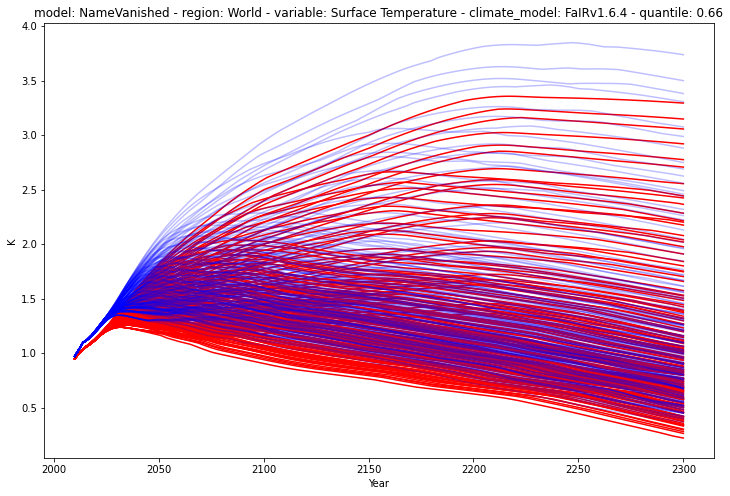

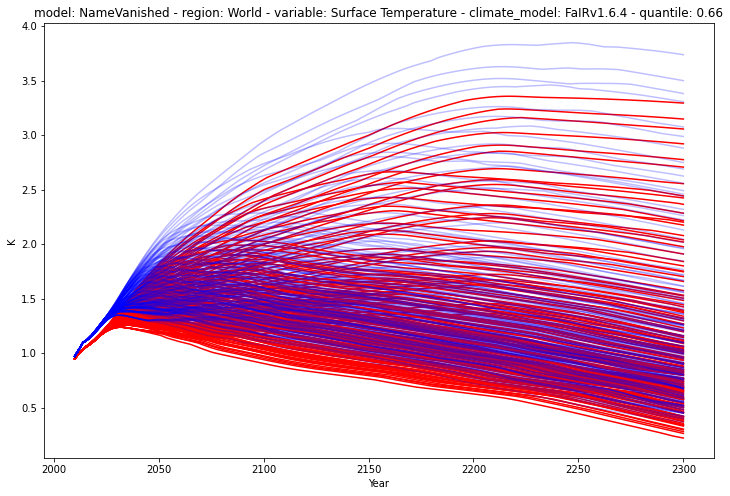

In [7]:
plt.figure(figsize=(12, 8))
ax=plt.subplot()
temps_py.filter(quantile=0.33, scenario="*10000*").plot(ax=ax, color="r")
temps_py.filter(quantile=0.66, scenario="*10000*").plot(ax=ax, color="b", alpha=0.25)

In [8]:
temps

climate_model         model region  \
0       FaIRv1.6.4  NameVanished  World   
1       FaIRv1.6.4  NameVanished  World   
2       FaIRv1.6.4  NameVanished  World   
3       FaIRv1.6.4  NameVanished  World   
4       FaIRv1.6.4  NameVanished  World   
...            ...           ...    ...   
4495    FaIRv1.6.4  NameVanished  World   
4496    FaIRv1.6.4  NameVanished  World   
4497    FaIRv1.6.4  NameVanished  World   
4498    FaIRv1.6.4  NameVanished  World   
4499    FaIRv1.6.4  NameVanished  World   

                                        scenario unit             variable  \
0     scen_2030fact0.12_nz2040_ov-10000_meth0.25    K  Surface Temperature   
1      scen_2030fact0.12_nz2040_ov-10000_meth0.5    K  Surface Temperature   
2     scen_2030fact0.12_nz2040_ov-10000_meth0.75    K  Surface Temperature   
3      scen_2030fact0.12_nz2040_ov-2500_meth0.25    K  Surface Temperature   
4       scen_2030fact0.12_nz2040_ov-2500_meth0.5    K  Surface Temperature   
...                                          ...  ...                  ...   
4495    scen_2030fact1.32_nz2200_ov-7500_meth0.5    K  Surface Temperature   
4496   scen_2030fact1.32_nz2200_ov-7500_meth0.75    K  Surface Temperature   
4497       scen_2030fact1.32_nz2200_ov0_meth0.25    K  Surface Temperature   
4498        scen_2030fact1.32_nz2200_ov0_meth0.5    K  Surface Temperature   
4499       scen_2030fact1.32_nz2200_ov0_meth0.75    K  Surface Temperature   

      quantile      2010      2011      2012  ...      2291      2292  \
0          0.1  0.932584  0.949229  0.965410  ...  0.169997  0.166608   
1          0.1  0.932539  0.949206  0.965461  ...  0.217677  0.214607   
2          0.1  0.932460  0.949167  0.965550  ...  0.240569  0.237498   
3          0.1  0.932584  0.949229  0.965410  ...  0.789249  0.788406   
4          0.1  0.932539  0.949206  0.965461  ...  0.838614  0.837793   
...        ...       ...       ...       ...  ...       ...       ...   
4495       0.9  0.996854  1.026663  1.060538  ...  4.151669  4.152037   
4496       0.9  0.996720  1.026592  1.060700  ...  4.341270  4.341908   
4497       0.9  0.996931  1.026704  1.060446  ...  4.260658  4.264124   
4498       0.9  0.996854  1.026663  1.060538  ...  4.381818  4.385430   
4499       0.9  0.996720  1.026592  1.060700  ...  4.571763  4.575654   

          2293      2294      2295      2296      2297      2298      2299  \
0     0.163233  0.159871  0.156523  0.153188  0.149867  0.146559  0.143265   
1     0.211549  0.208503  0.205470  0.202449  0.199440  0.196444  0.193460   
2     0.234438  0.231391  0.228356  0.225333  0.222322  0.219324  0.216338   
3     0.787563  0.786721  0.785879  0.785038  0.784198  0.783358  0.782519   
4     0.836974  0.836154  0.835335  0.834517  0.833699  0.832882  0.832065   
...        ...       ...       ...       ...       ...       ...       ...   
4495  4.152377  4.152690  4.152975  4.153232  4.153462  4.153664  4.153839   
4496  4.342517  4.343098  4.343650  4.344173  4.344668  4.345134  4.345573   
4497  4.267571  4.271000  4.274411  4.277804  4.281178  4.284534  4.287872   
4498  4.389023  4.392596  4.396151  4.399688  4.403205  4.406704  4.410184   
4499  4.579526  4.583377  4.587209  4.591021  4.594814  4.598587  4.602341   

          2300  
0     0.140951  
1     0.190489  
2     0.213364  
3     0.781681  
4     0.831248  
...        ...  
4495  4.153987  
4496  4.345983  
4497  4.291192  
4498  4.413646  
4499  4.606075  

[4500 rows x 298 columns]

climate_model         model region  \
0       FaIRv1.6.4  NameVanished  World   
1       FaIRv1.6.4  NameVanished  World   
2       FaIRv1.6.4  NameVanished  World   
3       FaIRv1.6.4  NameVanished  World   
4       FaIRv1.6.4  NameVanished  World   
...            ...           ...    ...   
4495    FaIRv1.6.4  NameVanished  World   
4496    FaIRv1.6.4  NameVanished  World   
4497    FaIRv1.6.4  NameVanished  World   
4498    FaIRv1.6.4  NameVanished  World   
4499    FaIRv1.6.4  NameVanished  World   

                                        scenario unit             variable  \
0     scen_2030fact0.12_nz2040_ov-10000_meth0.25    K  Surface Temperature   
1      scen_2030fact0.12_nz2040_ov-10000_meth0.5    K  Surface Temperature   
2     scen_2030fact0.12_nz2040_ov-10000_meth0.75    K  Surface Temperature   
3      scen_2030fact0.12_nz2040_ov-2500_meth0.25    K  Surface Temperature   
4       scen_2030fact0.12_nz2040_ov-2500_meth0.5    K  Surface Temperature   
...                                          ...  ...                  ...   
4495    scen_2030fact1.32_nz2200_ov-7500_meth0.5    K  Surface Temperature   
4496   scen_2030fact1.32_nz2200_ov-7500_meth0.75    K  Surface Temperature   
4497       scen_2030fact1.32_nz2200_ov0_meth0.25    K  Surface Temperature   
4498        scen_2030fact1.32_nz2200_ov0_meth0.5    K  Surface Temperature   
4499       scen_2030fact1.32_nz2200_ov0_meth0.75    K  Surface Temperature   

      quantile      2010      2011      2012  ...      2291      2292  \
0          0.1  0.932584  0.949229  0.965410  ...  0.169997  0.166608   
1          0.1  0.932539  0.949206  0.965461  ...  0.217677  0.214607   
2          0.1  0.932460  0.949167  0.965550  ...  0.240569  0.237498   
3          0.1  0.932584  0.949229  0.965410  ...  0.789249  0.788406   
4          0.1  0.932539  0.949206  0.965461  ...  0.838614  0.837793   
...        ...       ...       ...       ...  ...       ...       ...   
4495       0.9  0.996854  1.026663  1.060538  ...  4.151669  4.152037   
4496       0.9  0.996720  1.026592  1.060700  ...  4.341270  4.341908   
4497       0.9  0.996931  1.026704  1.060446  ...  4.260658  4.264124   
4498       0.9  0.996854  1.026663  1.060538  ...  4.381818  4.385430   
4499       0.9  0.996720  1.026592  1.060700  ...  4.571763  4.575654   

          2293      2294      2295      2296      2297      2298      2299  \
0     0.163233  0.159871  0.156523  0.153188  0.149867  0.146559  0.143265   
1     0.211549  0.208503  0.205470  0.202449  0.199440  0.196444  0.193460   
2     0.234438  0.231391  0.228356  0.225333  0.222322  0.219324  0.216338   
3     0.787563  0.786721  0.785879  0.785038  0.784198  0.783358  0.782519   
4     0.836974  0.836154  0.835335  0.834517  0.833699  0.832882  0.832065   
...        ...       ...       ...       ...       ...       ...       ...   
4495  4.152377  4.152690  4.152975  4.153232  4.153462  4.153664  4.153839   
4496  4.342517  4.343098  4.343650  4.344173  4.344668  4.345134  4.345573   
4497  4.267571  4.271000  4.274411  4.277804  4.281178  4.284534  4.287872   
4498  4.389023  4.392596  4.396151  4.399688  4.403205  4.406704  4.410184   
4499  4.579526  4.583377  4.587209  4.591021  4.594814  4.598587  4.602341   

          2300  
0     0.140951  
1     0.190489  
2     0.213364  
3     0.781681  
4     0.831248  
...        ...  
4495  4.153987  
4496  4.345983  
4497  4.291192  
4498  4.413646  
4499  4.606075  

[4500 rows x 298 columns]

In [9]:
temp_years = temps_py.filter(year=years)

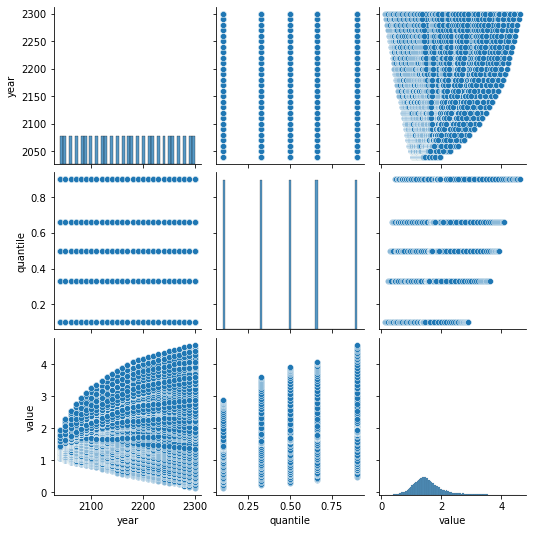

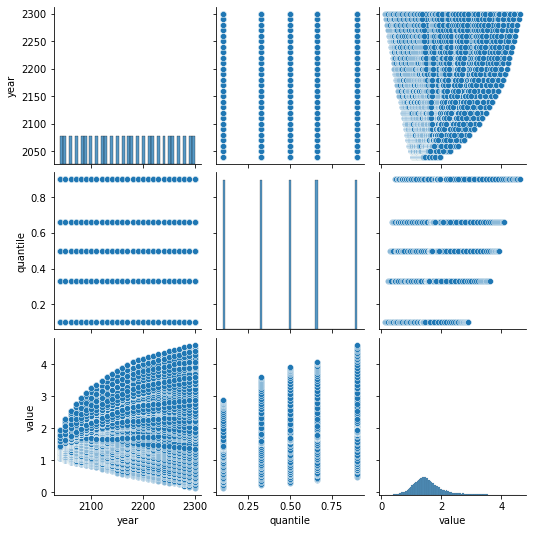

In [10]:
seaborn.pairplot(temp_years.data)

In [85]:
temps_90 = pyam.IamDataFrame(temps).filter(quantile=0.9).timeseries()
temps_50 = pyam.IamDataFrame(temps).filter(quantile=0.5).timeseries()
temps_10 = pyam.IamDataFrame(temps).filter(quantile=0.1).timeseries()
temps_33 = pyam.IamDataFrame(temps).filter(quantile=0.33).timeseries()
temps_66 = pyam.IamDataFrame(temps).filter(quantile=0.66).timeseries()
temps_90 = temps_90.reset_index(drop=True)
temps_50 = temps_50.reset_index(drop=True)
temps_10 = temps_10.reset_index(drop=True)
temps_33 = temps_33.reset_index(drop=True)
temps_66 = temps_66.reset_index(drop=True)
quantile_range = [0.10, 0.33, 0.50, 0.66, 0.90, "all"]
decomposers2 = {}
decomposers3 = {}
decomposers4 = {}
decomposers5 = {}
temp_data = {
    0.10: temps_10, 0.33: temps_33, 0.50: temps_50, 0.90:temps_90, 
    0.66: temps_66, "all": temps_py.timeseries()
}
for i in quantile_range:
    decomposers2[i] = sklearn.decomposition.PCA(2).fit(temp_data[i])
    decomposers3[i] = sklearn.decomposition.PCA(3).fit(temp_data[i])
    decomposers4[i] = sklearn.decomposition.PCA(4).fit(temp_data[i])
    decomposers5[i] = sklearn.decomposition.PCA(5).fit(temp_data[i])

# Try random forest method

In [12]:
pcacols = ["PCA1", "PCA2", "PCA3", "PCA4", "PCA5"]
# Switch between on and off to study the impact of considering all quantiles
if (False):
    pcadf = pd.DataFrame(
        decomposers5[0.5].fit_transform(temps_py.filter(quantile=0.5).timeseries()), 
        columns=pcacols,
        index=temps_py.filter(quantile=0.5).timeseries().index
    ).reset_index()
else:
    pcadf = pd.DataFrame(
        decomposers5["all"].fit_transform(temps_py.timeseries()), 
        columns=pcacols,
        index=temps_py.timeseries().index
    ).reset_index()

In [13]:
def decode_scen(df):
    df["factor2030"] = [float(x[1][:4]) for x in df["scenario"].str.split("2030fact")]
    df["nzdate"] = [int(x[1][:4]) for x in df["scenario"].str.split("_nz")]
    df["overshoot"] = [float(x[3][2:]) for x in df["scenario"].str.split("_")]
    df["methane"] = [float(x[4][4:]) for x in df["scenario"].str.split("_")]
    # The numerical stability of calculations is higher when variables are all of order 1
    df["nzreduced"] = df["nzdate"] / 100 - 20
    df["overshootreduced"] = df["overshoot"]/10000
    return df
pcadf = decode_scen(pcadf)
pcadf

model                                    scenario region  \
0     NameVanished  scen_2030fact0.12_nz2040_ov-10000_meth0.25  World   
1     NameVanished  scen_2030fact0.12_nz2040_ov-10000_meth0.25  World   
2     NameVanished  scen_2030fact0.12_nz2040_ov-10000_meth0.25  World   
3     NameVanished  scen_2030fact0.12_nz2040_ov-10000_meth0.25  World   
4     NameVanished  scen_2030fact0.12_nz2040_ov-10000_meth0.25  World   
...            ...                                         ...    ...   
4495  NameVanished       scen_2030fact1.32_nz2200_ov0_meth0.75  World   
4496  NameVanished       scen_2030fact1.32_nz2200_ov0_meth0.75  World   
4497  NameVanished       scen_2030fact1.32_nz2200_ov0_meth0.75  World   
4498  NameVanished       scen_2030fact1.32_nz2200_ov0_meth0.75  World   
4499  NameVanished       scen_2030fact1.32_nz2200_ov0_meth0.75  World   

                 variable unit climate_model  quantile       PCA1      PCA2  \
0     Surface Temperature    K    FaIRv1.6.4      0.10 -16.606031 -0.606375   
1     Surface Temperature    K    FaIRv1.6.4      0.33 -14.395001  0.050277   
2     Surface Temperature    K    FaIRv1.6.4      0.50 -13.262292  0.707713   
3     Surface Temperature    K    FaIRv1.6.4      0.66 -12.460885  0.962608   
4     Surface Temperature    K    FaIRv1.6.4      0.90 -10.843689  1.450493   
...                   ...  ...           ...       ...        ...       ...   
4495  Surface Temperature    K    FaIRv1.6.4      0.10  15.816842 -2.100417   
4496  Surface Temperature    K    FaIRv1.6.4      0.33  24.519780 -2.150661   
4497  Surface Temperature    K    FaIRv1.6.4      0.50  28.968867 -2.310612   
4498  Surface Temperature    K    FaIRv1.6.4      0.66  31.447401 -1.329638   
4499  Surface Temperature    K    FaIRv1.6.4      0.90  37.349679 -0.938812   

          PCA3      PCA4      PCA5  factor2030  nzdate  overshoot  methane  \
0    -0.550879 -0.198509 -0.059129        0.12    2040   -10000.0     0.25   
1    -0.394888  0.231765  0.252606        0.12    2040   -10000.0     0.25   
2    -0.488155  0.202245 -0.076384        0.12    2040   -10000.0     0.25   
3    -0.359962  0.328655 -0.135353        0.12    2040   -10000.0     0.25   
4     0.081718  0.531582 -0.279401        0.12    2040   -10000.0     0.25   
...        ...       ...       ...         ...     ...        ...      ...   
4495 -0.617982 -0.454528  0.085754        1.32    2200        0.0     0.75   
4496 -0.453872 -0.401109 -0.070481        1.32    2200        0.0     0.75   
4497 -0.510951  0.112578  0.333311        1.32    2200        0.0     0.75   
4498 -0.396346 -0.179470 -0.123920        1.32    2200        0.0     0.75   
4499  0.127031 -0.251919 -0.285752        1.32    2200        0.0     0.75   

      nzreduced  overshootreduced  
0           0.4              -1.0  
1           0.4              -1.0  
2           0.4              -1.0  
3           0.4              -1.0  
4           0.4              -1.0  
...         ...               ...  
4495        2.0               0.0  
4496        2.0               0.0  
4497        2.0               0.0  
4498        2.0               0.0  
4499        2.0               0.0  

[4500 rows x 18 columns]

model                                    scenario region  \
0     NameVanished  scen_2030fact0.12_nz2040_ov-10000_meth0.25  World   
1     NameVanished  scen_2030fact0.12_nz2040_ov-10000_meth0.25  World   
2     NameVanished  scen_2030fact0.12_nz2040_ov-10000_meth0.25  World   
3     NameVanished  scen_2030fact0.12_nz2040_ov-10000_meth0.25  World   
4     NameVanished  scen_2030fact0.12_nz2040_ov-10000_meth0.25  World   
...            ...                                         ...    ...   
4495  NameVanished       scen_2030fact1.32_nz2200_ov0_meth0.75  World   
4496  NameVanished       scen_2030fact1.32_nz2200_ov0_meth0.75  World   
4497  NameVanished       scen_2030fact1.32_nz2200_ov0_meth0.75  World   
4498  NameVanished       scen_2030fact1.32_nz2200_ov0_meth0.75  World   
4499  NameVanished       scen_2030fact1.32_nz2200_ov0_meth0.75  World   

                 variable unit climate_model  quantile       PCA1      PCA2  \
0     Surface Temperature    K    FaIRv1.6.4      0.10 -16.606031 -0.606375   
1     Surface Temperature    K    FaIRv1.6.4      0.33 -14.395001  0.050277   
2     Surface Temperature    K    FaIRv1.6.4      0.50 -13.262292  0.707713   
3     Surface Temperature    K    FaIRv1.6.4      0.66 -12.460885  0.962608   
4     Surface Temperature    K    FaIRv1.6.4      0.90 -10.843689  1.450493   
...                   ...  ...           ...       ...        ...       ...   
4495  Surface Temperature    K    FaIRv1.6.4      0.10  15.816842 -2.100417   
4496  Surface Temperature    K    FaIRv1.6.4      0.33  24.519780 -2.150661   
4497  Surface Temperature    K    FaIRv1.6.4      0.50  28.968867 -2.310612   
4498  Surface Temperature    K    FaIRv1.6.4      0.66  31.447401 -1.329638   
4499  Surface Temperature    K    FaIRv1.6.4      0.90  37.349679 -0.938812   

          PCA3      PCA4      PCA5  factor2030  nzdate  overshoot  methane  \
0    -0.550879 -0.198509 -0.059129        0.12    2040   -10000.0     0.25   
1    -0.394888  0.231765  0.252606        0.12    2040   -10000.0     0.25   
2    -0.488155  0.202245 -0.076384        0.12    2040   -10000.0     0.25   
3    -0.359962  0.328655 -0.135353        0.12    2040   -10000.0     0.25   
4     0.081718  0.531582 -0.279401        0.12    2040   -10000.0     0.25   
...        ...       ...       ...         ...     ...        ...      ...   
4495 -0.617982 -0.454528  0.085754        1.32    2200        0.0     0.75   
4496 -0.453872 -0.401109 -0.070481        1.32    2200        0.0     0.75   
4497 -0.510951  0.112578  0.333311        1.32    2200        0.0     0.75   
4498 -0.396346 -0.179470 -0.123920        1.32    2200        0.0     0.75   
4499  0.127031 -0.251919 -0.285752        1.32    2200        0.0     0.75   

      nzreduced  overshootreduced  
0           0.4              -1.0  
1           0.4              -1.0  
2           0.4              -1.0  
3           0.4              -1.0  
4           0.4              -1.0  
...         ...               ...  
4495        2.0               0.0  
4496        2.0               0.0  
4497        2.0               0.0  
4498        2.0               0.0  
4499        2.0               0.0  

[4500 rows x 18 columns]

In [14]:
functional_cols = ["factor2030", "nzreduced", "overshootreduced", "methane"]
pcadf = pcadf.set_index("scenario", drop=True).loc[:, ["quantile"] + functional_cols + pcacols]
pcadf

quantile  factor2030  nzreduced  \
scenario                                                                      
scen_2030fact0.12_nz2040_ov-10000_meth0.25      0.10        0.12        0.4   
scen_2030fact0.12_nz2040_ov-10000_meth0.25      0.33        0.12        0.4   
scen_2030fact0.12_nz2040_ov-10000_meth0.25      0.50        0.12        0.4   
scen_2030fact0.12_nz2040_ov-10000_meth0.25      0.66        0.12        0.4   
scen_2030fact0.12_nz2040_ov-10000_meth0.25      0.90        0.12        0.4   
...                                              ...         ...        ...   
scen_2030fact1.32_nz2200_ov0_meth0.75           0.10        1.32        2.0   
scen_2030fact1.32_nz2200_ov0_meth0.75           0.33        1.32        2.0   
scen_2030fact1.32_nz2200_ov0_meth0.75           0.50        1.32        2.0   
scen_2030fact1.32_nz2200_ov0_meth0.75           0.66        1.32        2.0   
scen_2030fact1.32_nz2200_ov0_meth0.75           0.90        1.32        2.0   

                                            overshootreduced  methane  \
scenario                                                                
scen_2030fact0.12_nz2040_ov-10000_meth0.25              -1.0     0.25   
scen_2030fact0.12_nz2040_ov-10000_meth0.25              -1.0     0.25   
scen_2030fact0.12_nz2040_ov-10000_meth0.25              -1.0     0.25   
scen_2030fact0.12_nz2040_ov-10000_meth0.25              -1.0     0.25   
scen_2030fact0.12_nz2040_ov-10000_meth0.25              -1.0     0.25   
...                                                      ...      ...   
scen_2030fact1.32_nz2200_ov0_meth0.75                    0.0     0.75   
scen_2030fact1.32_nz2200_ov0_meth0.75                    0.0     0.75   
scen_2030fact1.32_nz2200_ov0_meth0.75                    0.0     0.75   
scen_2030fact1.32_nz2200_ov0_meth0.75                    0.0     0.75   
scen_2030fact1.32_nz2200_ov0_meth0.75                    0.0     0.75   

                                                 PCA1      PCA2      PCA3  \
scenario                                                                    
scen_2030fact0.12_nz2040_ov-10000_meth0.25 -16.606031 -0.606375 -0.550879   
scen_2030fact0.12_nz2040_ov-10000_meth0.25 -14.395001  0.050277 -0.394888   
scen_2030fact0.12_nz2040_ov-10000_meth0.25 -13.262292  0.707713 -0.488155   
scen_2030fact0.12_nz2040_ov-10000_meth0.25 -12.460885  0.962608 -0.359962   
scen_2030fact0.12_nz2040_ov-10000_meth0.25 -10.843689  1.450493  0.081718   
...                                               ...       ...       ...   
scen_2030fact1.32_nz2200_ov0_meth0.75       15.816842 -2.100417 -0.617982   
scen_2030fact1.32_nz2200_ov0_meth0.75       24.519780 -2.150661 -0.453872   
scen_2030fact1.32_nz2200_ov0_meth0.75       28.968867 -2.310612 -0.510951   
scen_2030fact1.32_nz2200_ov0_meth0.75       31.447401 -1.329638 -0.396346   
scen_2030fact1.32_nz2200_ov0_meth0.75       37.349679 -0.938812  0.127031   

                                                PCA4      PCA5  
scenario                                                        
scen_2030fact0.12_nz2040_ov-10000_meth0.25 -0.198509 -0.059129  
scen_2030fact0.12_nz2040_ov-10000_meth0.25  0.231765  0.252606  
scen_2030fact0.12_nz2040_ov-10000_meth0.25  0.202245 -0.076384  
scen_2030fact0.12_nz2040_ov-10000_meth0.25  0.328655 -0.135353  
scen_2030fact0.12_nz2040_ov-10000_meth0.25  0.531582 -0.279401  
...                                              ...       ...  
scen_2030fact1.32_nz2200_ov0_meth0.75      -0.454528  0.085754  
scen_2030fact1.32_nz2200_ov0_meth0.75      -0.401109 -0.070481  
scen_2030fact1.32_nz2200_ov0_meth0.75       0.112578  0.333311  
scen_2030fact1.32_nz2200_ov0_meth0.75      -0.179470 -0.123920  
scen_2030fact1.32_nz2200_ov0_meth0.75      -0.251919 -0.285752  

[4500 rows x 10 columns]

quantile  factor2030  nzreduced  \
scenario                                                                      
scen_2030fact0.12_nz2040_ov-10000_meth0.25      0.10        0.12        0.4   
scen_2030fact0.12_nz2040_ov-10000_meth0.25      0.33        0.12        0.4   
scen_2030fact0.12_nz2040_ov-10000_meth0.25      0.50        0.12        0.4   
scen_2030fact0.12_nz2040_ov-10000_meth0.25      0.66        0.12        0.4   
scen_2030fact0.12_nz2040_ov-10000_meth0.25      0.90        0.12        0.4   
...                                              ...         ...        ...   
scen_2030fact1.32_nz2200_ov0_meth0.75           0.10        1.32        2.0   
scen_2030fact1.32_nz2200_ov0_meth0.75           0.33        1.32        2.0   
scen_2030fact1.32_nz2200_ov0_meth0.75           0.50        1.32        2.0   
scen_2030fact1.32_nz2200_ov0_meth0.75           0.66        1.32        2.0   
scen_2030fact1.32_nz2200_ov0_meth0.75           0.90        1.32        2.0   

                                            overshootreduced  methane  \
scenario                                                                
scen_2030fact0.12_nz2040_ov-10000_meth0.25              -1.0     0.25   
scen_2030fact0.12_nz2040_ov-10000_meth0.25              -1.0     0.25   
scen_2030fact0.12_nz2040_ov-10000_meth0.25              -1.0     0.25   
scen_2030fact0.12_nz2040_ov-10000_meth0.25              -1.0     0.25   
scen_2030fact0.12_nz2040_ov-10000_meth0.25              -1.0     0.25   
...                                                      ...      ...   
scen_2030fact1.32_nz2200_ov0_meth0.75                    0.0     0.75   
scen_2030fact1.32_nz2200_ov0_meth0.75                    0.0     0.75   
scen_2030fact1.32_nz2200_ov0_meth0.75                    0.0     0.75   
scen_2030fact1.32_nz2200_ov0_meth0.75                    0.0     0.75   
scen_2030fact1.32_nz2200_ov0_meth0.75                    0.0     0.75   

                                                 PCA1      PCA2      PCA3  \
scenario                                                                    
scen_2030fact0.12_nz2040_ov-10000_meth0.25 -16.606031 -0.606375 -0.550879   
scen_2030fact0.12_nz2040_ov-10000_meth0.25 -14.395001  0.050277 -0.394888   
scen_2030fact0.12_nz2040_ov-10000_meth0.25 -13.262292  0.707713 -0.488155   
scen_2030fact0.12_nz2040_ov-10000_meth0.25 -12.460885  0.962608 -0.359962   
scen_2030fact0.12_nz2040_ov-10000_meth0.25 -10.843689  1.450493  0.081718   
...                                               ...       ...       ...   
scen_2030fact1.32_nz2200_ov0_meth0.75       15.816842 -2.100417 -0.617982   
scen_2030fact1.32_nz2200_ov0_meth0.75       24.519780 -2.150661 -0.453872   
scen_2030fact1.32_nz2200_ov0_meth0.75       28.968867 -2.310612 -0.510951   
scen_2030fact1.32_nz2200_ov0_meth0.75       31.447401 -1.329638 -0.396346   
scen_2030fact1.32_nz2200_ov0_meth0.75       37.349679 -0.938812  0.127031   

                                                PCA4      PCA5  
scenario                                                        
scen_2030fact0.12_nz2040_ov-10000_meth0.25 -0.198509 -0.059129  
scen_2030fact0.12_nz2040_ov-10000_meth0.25  0.231765  0.252606  
scen_2030fact0.12_nz2040_ov-10000_meth0.25  0.202245 -0.076384  
scen_2030fact0.12_nz2040_ov-10000_meth0.25  0.328655 -0.135353  
scen_2030fact0.12_nz2040_ov-10000_meth0.25  0.531582 -0.279401  
...                                              ...       ...  
scen_2030fact1.32_nz2200_ov0_meth0.75      -0.454528  0.085754  
scen_2030fact1.32_nz2200_ov0_meth0.75      -0.401109 -0.070481  
scen_2030fact1.32_nz2200_ov0_meth0.75       0.112578  0.333311  
scen_2030fact1.32_nz2200_ov0_meth0.75      -0.179470 -0.123920  
scen_2030fact1.32_nz2200_ov0_meth0.75      -0.251919 -0.285752  

[4500 rows x 10 columns]

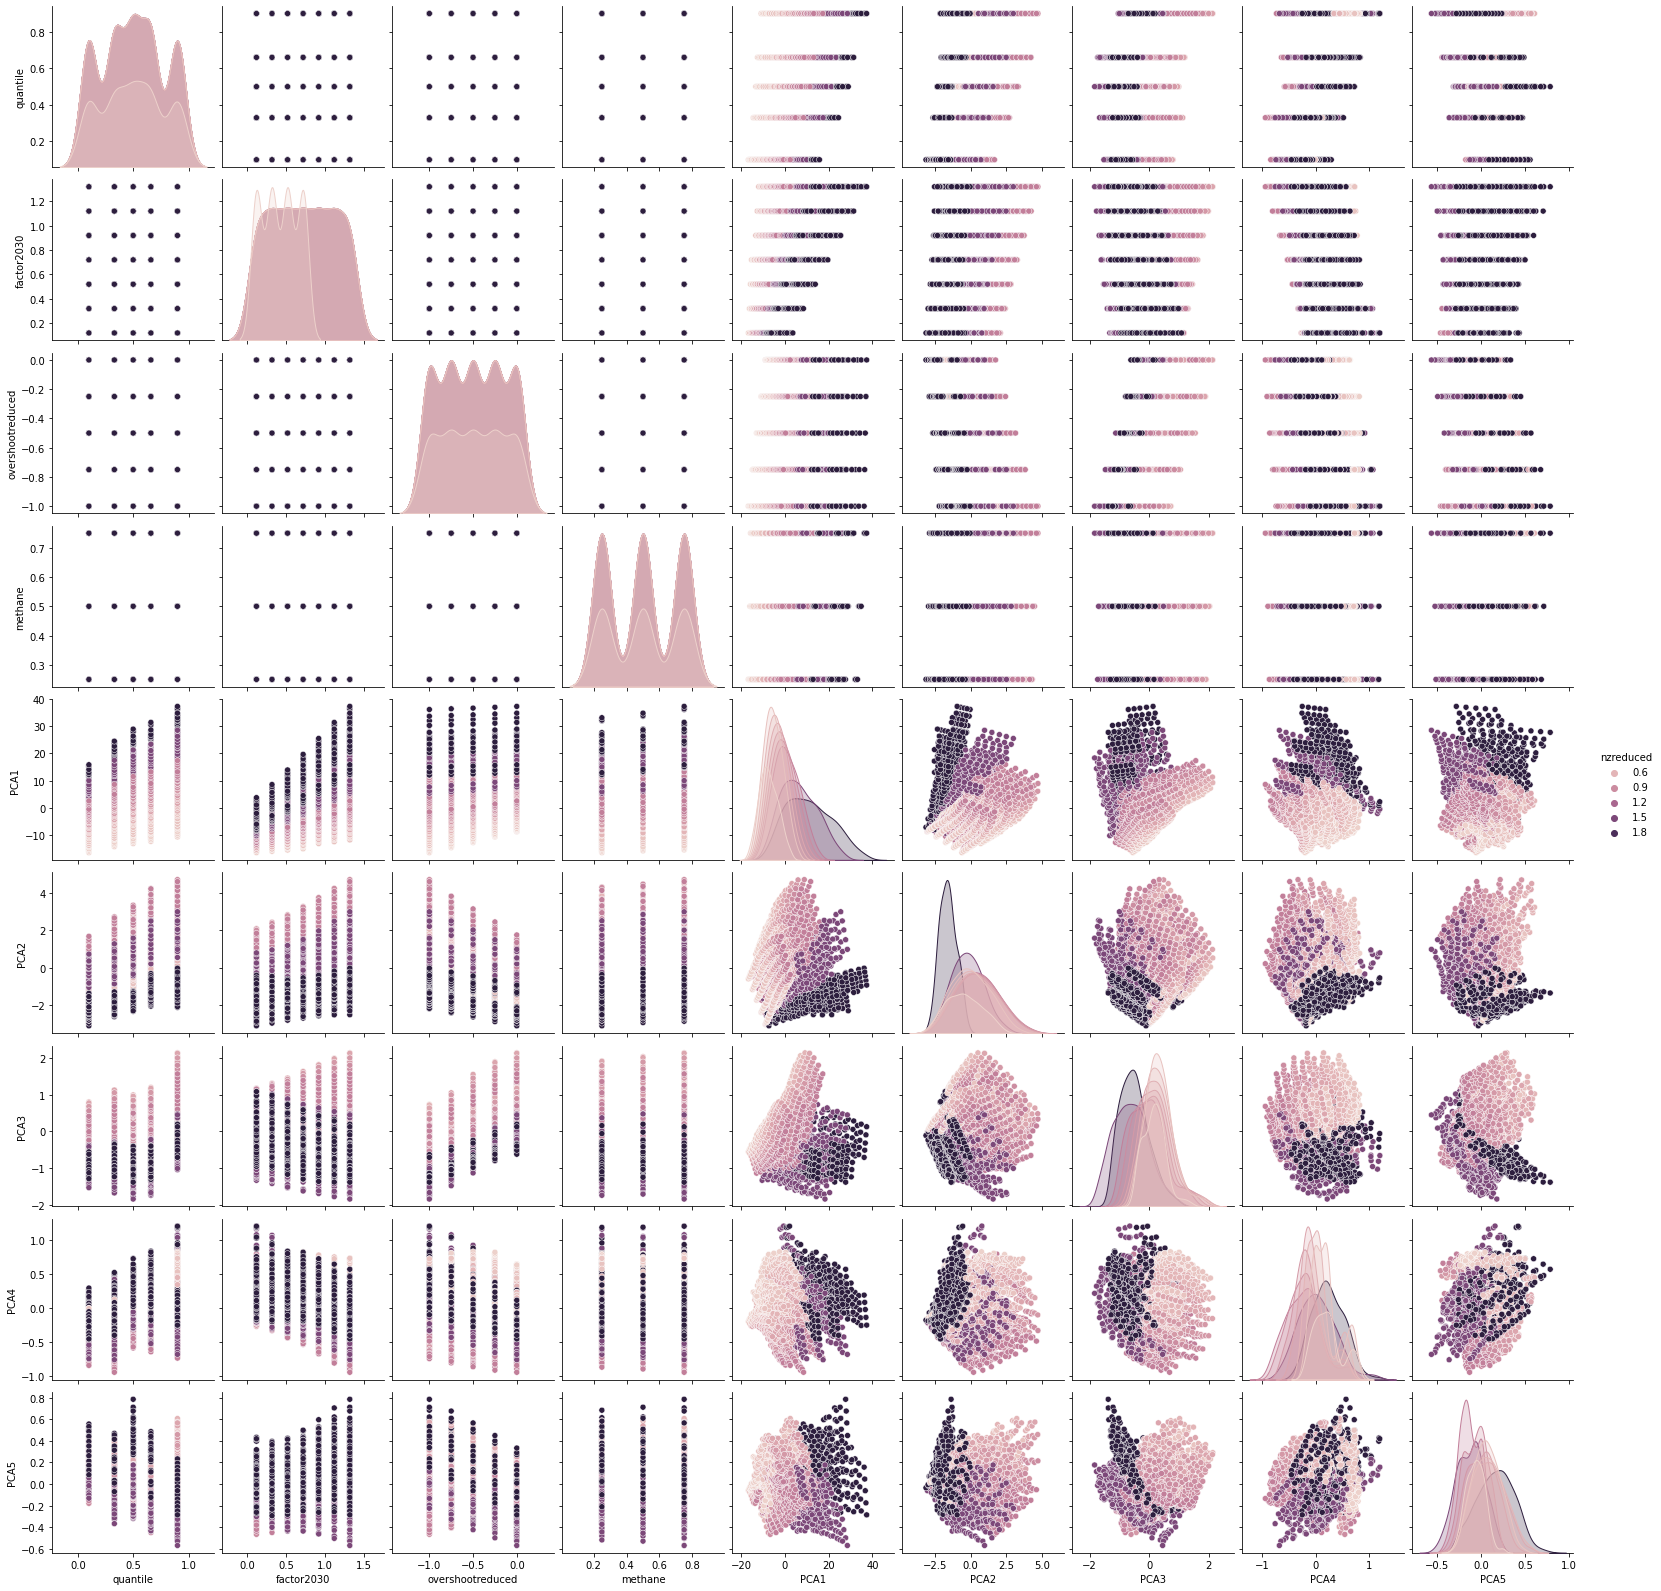

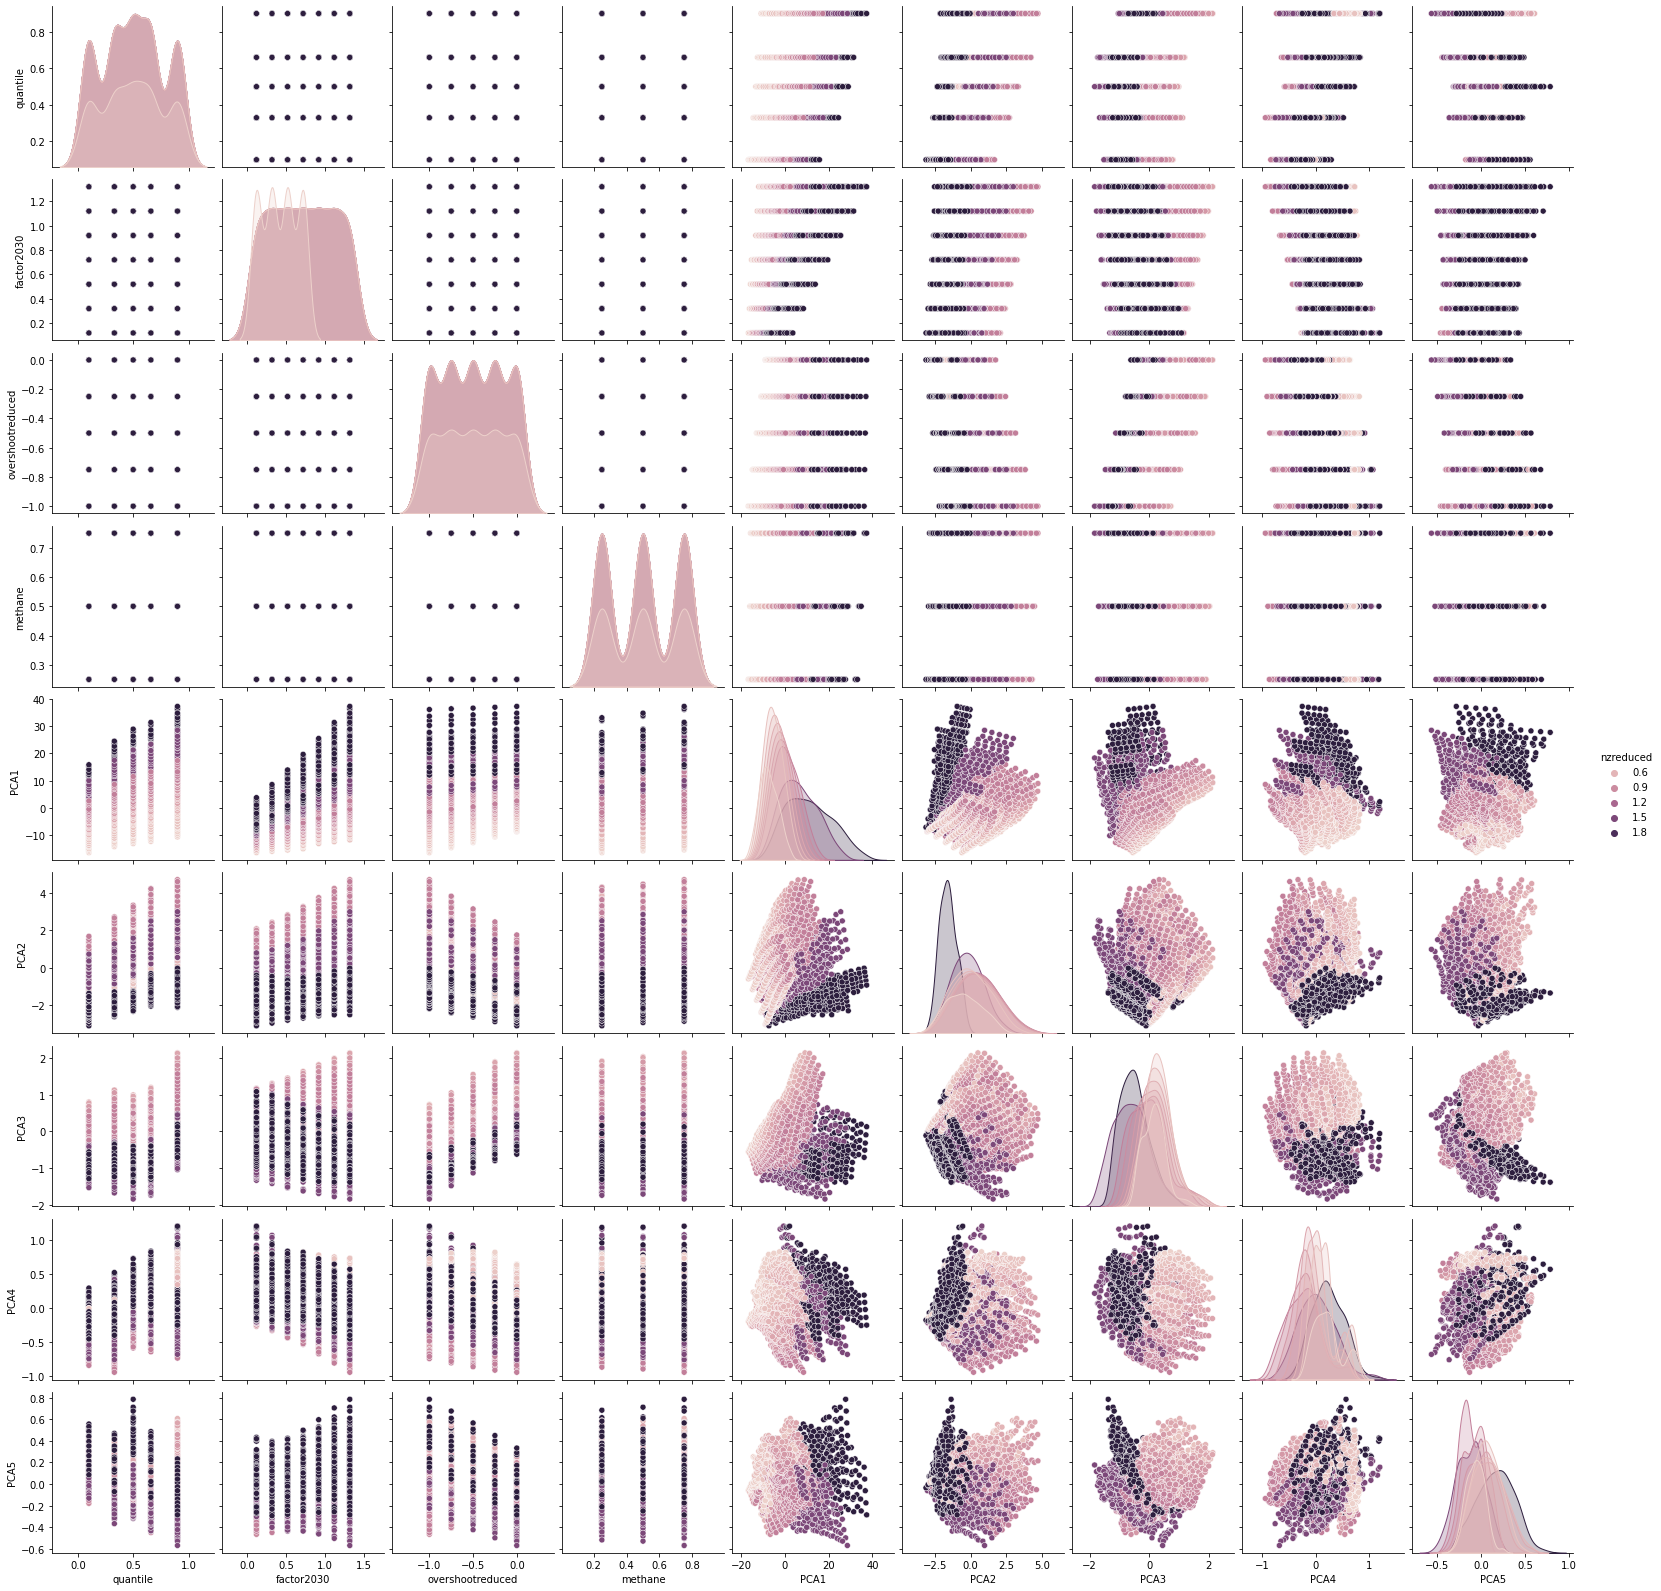

In [15]:
seaborn.pairplot(pcadf.reset_index(drop=True), hue="nzreduced")

In [16]:
pca_train, pca_test, pca_res_train, pca_res_test = train_test_split(
    pcadf.loc[:, pcacols + ["quantile"]], pcadf.loc[:, functional_cols], test_size = 0.2, random_state = 4
)

In [17]:
pcadf

quantile  factor2030  nzreduced  \
scenario                                                                      
scen_2030fact0.12_nz2040_ov-10000_meth0.25      0.10        0.12        0.4   
scen_2030fact0.12_nz2040_ov-10000_meth0.25      0.33        0.12        0.4   
scen_2030fact0.12_nz2040_ov-10000_meth0.25      0.50        0.12        0.4   
scen_2030fact0.12_nz2040_ov-10000_meth0.25      0.66        0.12        0.4   
scen_2030fact0.12_nz2040_ov-10000_meth0.25      0.90        0.12        0.4   
...                                              ...         ...        ...   
scen_2030fact1.32_nz2200_ov0_meth0.75           0.10        1.32        2.0   
scen_2030fact1.32_nz2200_ov0_meth0.75           0.33        1.32        2.0   
scen_2030fact1.32_nz2200_ov0_meth0.75           0.50        1.32        2.0   
scen_2030fact1.32_nz2200_ov0_meth0.75           0.66        1.32        2.0   
scen_2030fact1.32_nz2200_ov0_meth0.75           0.90        1.32        2.0   

                                            overshootreduced  methane  \
scenario                                                                
scen_2030fact0.12_nz2040_ov-10000_meth0.25              -1.0     0.25   
scen_2030fact0.12_nz2040_ov-10000_meth0.25              -1.0     0.25   
scen_2030fact0.12_nz2040_ov-10000_meth0.25              -1.0     0.25   
scen_2030fact0.12_nz2040_ov-10000_meth0.25              -1.0     0.25   
scen_2030fact0.12_nz2040_ov-10000_meth0.25              -1.0     0.25   
...                                                      ...      ...   
scen_2030fact1.32_nz2200_ov0_meth0.75                    0.0     0.75   
scen_2030fact1.32_nz2200_ov0_meth0.75                    0.0     0.75   
scen_2030fact1.32_nz2200_ov0_meth0.75                    0.0     0.75   
scen_2030fact1.32_nz2200_ov0_meth0.75                    0.0     0.75   
scen_2030fact1.32_nz2200_ov0_meth0.75                    0.0     0.75   

                                                 PCA1      PCA2      PCA3  \
scenario                                                                    
scen_2030fact0.12_nz2040_ov-10000_meth0.25 -16.606031 -0.606375 -0.550879   
scen_2030fact0.12_nz2040_ov-10000_meth0.25 -14.395001  0.050277 -0.394888   
scen_2030fact0.12_nz2040_ov-10000_meth0.25 -13.262292  0.707713 -0.488155   
scen_2030fact0.12_nz2040_ov-10000_meth0.25 -12.460885  0.962608 -0.359962   
scen_2030fact0.12_nz2040_ov-10000_meth0.25 -10.843689  1.450493  0.081718   
...                                               ...       ...       ...   
scen_2030fact1.32_nz2200_ov0_meth0.75       15.816842 -2.100417 -0.617982   
scen_2030fact1.32_nz2200_ov0_meth0.75       24.519780 -2.150661 -0.453872   
scen_2030fact1.32_nz2200_ov0_meth0.75       28.968867 -2.310612 -0.510951   
scen_2030fact1.32_nz2200_ov0_meth0.75       31.447401 -1.329638 -0.396346   
scen_2030fact1.32_nz2200_ov0_meth0.75       37.349679 -0.938812  0.127031   

                                                PCA4      PCA5  
scenario                                                        
scen_2030fact0.12_nz2040_ov-10000_meth0.25 -0.198509 -0.059129  
scen_2030fact0.12_nz2040_ov-10000_meth0.25  0.231765  0.252606  
scen_2030fact0.12_nz2040_ov-10000_meth0.25  0.202245 -0.076384  
scen_2030fact0.12_nz2040_ov-10000_meth0.25  0.328655 -0.135353  
scen_2030fact0.12_nz2040_ov-10000_meth0.25  0.531582 -0.279401  
...                                              ...       ...  
scen_2030fact1.32_nz2200_ov0_meth0.75      -0.454528  0.085754  
scen_2030fact1.32_nz2200_ov0_meth0.75      -0.401109 -0.070481  
scen_2030fact1.32_nz2200_ov0_meth0.75       0.112578  0.333311  
scen_2030fact1.32_nz2200_ov0_meth0.75      -0.179470 -0.123920  
scen_2030fact1.32_nz2200_ov0_meth0.75      -0.251919 -0.285752  

[4500 rows x 10 columns]

quantile  factor2030  nzreduced  \
scenario                                                                      
scen_2030fact0.12_nz2040_ov-10000_meth0.25      0.10        0.12        0.4   
scen_2030fact0.12_nz2040_ov-10000_meth0.25      0.33        0.12        0.4   
scen_2030fact0.12_nz2040_ov-10000_meth0.25      0.50        0.12        0.4   
scen_2030fact0.12_nz2040_ov-10000_meth0.25      0.66        0.12        0.4   
scen_2030fact0.12_nz2040_ov-10000_meth0.25      0.90        0.12        0.4   
...                                              ...         ...        ...   
scen_2030fact1.32_nz2200_ov0_meth0.75           0.10        1.32        2.0   
scen_2030fact1.32_nz2200_ov0_meth0.75           0.33        1.32        2.0   
scen_2030fact1.32_nz2200_ov0_meth0.75           0.50        1.32        2.0   
scen_2030fact1.32_nz2200_ov0_meth0.75           0.66        1.32        2.0   
scen_2030fact1.32_nz2200_ov0_meth0.75           0.90        1.32        2.0   

                                            overshootreduced  methane  \
scenario                                                                
scen_2030fact0.12_nz2040_ov-10000_meth0.25              -1.0     0.25   
scen_2030fact0.12_nz2040_ov-10000_meth0.25              -1.0     0.25   
scen_2030fact0.12_nz2040_ov-10000_meth0.25              -1.0     0.25   
scen_2030fact0.12_nz2040_ov-10000_meth0.25              -1.0     0.25   
scen_2030fact0.12_nz2040_ov-10000_meth0.25              -1.0     0.25   
...                                                      ...      ...   
scen_2030fact1.32_nz2200_ov0_meth0.75                    0.0     0.75   
scen_2030fact1.32_nz2200_ov0_meth0.75                    0.0     0.75   
scen_2030fact1.32_nz2200_ov0_meth0.75                    0.0     0.75   
scen_2030fact1.32_nz2200_ov0_meth0.75                    0.0     0.75   
scen_2030fact1.32_nz2200_ov0_meth0.75                    0.0     0.75   

                                                 PCA1      PCA2      PCA3  \
scenario                                                                    
scen_2030fact0.12_nz2040_ov-10000_meth0.25 -16.606031 -0.606375 -0.550879   
scen_2030fact0.12_nz2040_ov-10000_meth0.25 -14.395001  0.050277 -0.394888   
scen_2030fact0.12_nz2040_ov-10000_meth0.25 -13.262292  0.707713 -0.488155   
scen_2030fact0.12_nz2040_ov-10000_meth0.25 -12.460885  0.962608 -0.359962   
scen_2030fact0.12_nz2040_ov-10000_meth0.25 -10.843689  1.450493  0.081718   
...                                               ...       ...       ...   
scen_2030fact1.32_nz2200_ov0_meth0.75       15.816842 -2.100417 -0.617982   
scen_2030fact1.32_nz2200_ov0_meth0.75       24.519780 -2.150661 -0.453872   
scen_2030fact1.32_nz2200_ov0_meth0.75       28.968867 -2.310612 -0.510951   
scen_2030fact1.32_nz2200_ov0_meth0.75       31.447401 -1.329638 -0.396346   
scen_2030fact1.32_nz2200_ov0_meth0.75       37.349679 -0.938812  0.127031   

                                                PCA4      PCA5  
scenario                                                        
scen_2030fact0.12_nz2040_ov-10000_meth0.25 -0.198509 -0.059129  
scen_2030fact0.12_nz2040_ov-10000_meth0.25  0.231765  0.252606  
scen_2030fact0.12_nz2040_ov-10000_meth0.25  0.202245 -0.076384  
scen_2030fact0.12_nz2040_ov-10000_meth0.25  0.328655 -0.135353  
scen_2030fact0.12_nz2040_ov-10000_meth0.25  0.531582 -0.279401  
...                                              ...       ...  
scen_2030fact1.32_nz2200_ov0_meth0.75      -0.454528  0.085754  
scen_2030fact1.32_nz2200_ov0_meth0.75      -0.401109 -0.070481  
scen_2030fact1.32_nz2200_ov0_meth0.75       0.112578  0.333311  
scen_2030fact1.32_nz2200_ov0_meth0.75      -0.179470 -0.123920  
scen_2030fact1.32_nz2200_ov0_meth0.75      -0.251919 -0.285752  

[4500 rows x 10 columns]

In [18]:
randforest = DecisionTreeRegressor()
randforest = randforest.fit(pca_train.values, pca_res_train.values)
randforest.score(pca_test.values, pca_res_test.values)

0.45449108461809057

0.45449108461809057

In [19]:
pca_train

PCA1      PCA2      PCA3  \
scenario                                                                   
scen_2030fact0.12_nz2040_ov0_meth0.5       -2.107356 -1.623861  0.518272   
scen_2030fact1.32_nz2100_ov-5000_meth0.5    7.963516  1.687641 -0.123958   
scen_2030fact0.52_nz2050_ov-10000_meth0.5  -9.808860  1.416086 -0.380326   
scen_2030fact1.32_nz2060_ov-10000_meth0.5  -2.950792  3.246133  0.256956   
scen_2030fact0.32_nz2200_ov-5000_meth0.5   -4.093134 -2.415950 -0.510034   
...                                              ...       ...       ...   
scen_2030fact1.12_nz2090_ov0_meth0.75       5.061934 -0.320188  0.838836   
scen_2030fact0.32_nz2040_ov-5000_meth0.25  -5.426541  0.268421  0.315306   
scen_2030fact0.72_nz2100_ov-10000_meth0.75 -0.527868  1.983508 -0.950998   
scen_2030fact0.12_nz2060_ov-2500_meth0.5   -1.514114 -0.575675  0.551172   
scen_2030fact0.32_nz2100_ov-2500_meth0.5   -3.285593 -1.366504  0.059299   

                                                PCA4      PCA5  quantile  
scenario                                                                  
scen_2030fact0.12_nz2040_ov0_meth0.5        0.207303 -0.208521      0.66  
scen_2030fact1.32_nz2100_ov-5000_meth0.5   -0.490519 -0.128070      0.50  
scen_2030fact0.52_nz2050_ov-10000_meth0.5   0.165459  0.046273      0.50  
scen_2030fact1.32_nz2060_ov-10000_meth0.5   0.008769  0.165390      0.66  
scen_2030fact0.32_nz2200_ov-5000_meth0.5   -0.021124  0.182482      0.10  
...                                              ...       ...       ...  
scen_2030fact1.12_nz2090_ov0_meth0.75      -0.721938  0.006125      0.33  
scen_2030fact0.32_nz2040_ov-5000_meth0.25   0.676555 -0.283645      0.90  
scen_2030fact0.72_nz2100_ov-10000_meth0.75 -0.103829 -0.246867      0.50  
scen_2030fact0.12_nz2060_ov-2500_meth0.5    0.684069 -0.142814      0.90  
scen_2030fact0.32_nz2100_ov-2500_meth0.5   -0.130218 -0.087861      0.33  

[3600 rows x 6 columns]

PCA1      PCA2      PCA3  \
scenario                                                                   
scen_2030fact0.12_nz2040_ov0_meth0.5       -2.107356 -1.623861  0.518272   
scen_2030fact1.32_nz2100_ov-5000_meth0.5    7.963516  1.687641 -0.123958   
scen_2030fact0.52_nz2050_ov-10000_meth0.5  -9.808860  1.416086 -0.380326   
scen_2030fact1.32_nz2060_ov-10000_meth0.5  -2.950792  3.246133  0.256956   
scen_2030fact0.32_nz2200_ov-5000_meth0.5   -4.093134 -2.415950 -0.510034   
...                                              ...       ...       ...   
scen_2030fact1.12_nz2090_ov0_meth0.75       5.061934 -0.320188  0.838836   
scen_2030fact0.32_nz2040_ov-5000_meth0.25  -5.426541  0.268421  0.315306   
scen_2030fact0.72_nz2100_ov-10000_meth0.75 -0.527868  1.983508 -0.950998   
scen_2030fact0.12_nz2060_ov-2500_meth0.5   -1.514114 -0.575675  0.551172   
scen_2030fact0.32_nz2100_ov-2500_meth0.5   -3.285593 -1.366504  0.059299   

                                                PCA4      PCA5  quantile  
scenario                                                                  
scen_2030fact0.12_nz2040_ov0_meth0.5        0.207303 -0.208521      0.66  
scen_2030fact1.32_nz2100_ov-5000_meth0.5   -0.490519 -0.128070      0.50  
scen_2030fact0.52_nz2050_ov-10000_meth0.5   0.165459  0.046273      0.50  
scen_2030fact1.32_nz2060_ov-10000_meth0.5   0.008769  0.165390      0.66  
scen_2030fact0.32_nz2200_ov-5000_meth0.5   -0.021124  0.182482      0.10  
...                                              ...       ...       ...  
scen_2030fact1.12_nz2090_ov0_meth0.75      -0.721938  0.006125      0.33  
scen_2030fact0.32_nz2040_ov-5000_meth0.25   0.676555 -0.283645      0.90  
scen_2030fact0.72_nz2100_ov-10000_meth0.75 -0.103829 -0.246867      0.50  
scen_2030fact0.12_nz2060_ov-2500_meth0.5    0.684069 -0.142814      0.90  
scen_2030fact0.32_nz2100_ov-2500_meth0.5   -0.130218 -0.087861      0.33  

[3600 rows x 6 columns]

In [20]:
pca_res_train

factor2030  nzreduced  \
scenario                                                            
scen_2030fact0.12_nz2040_ov0_meth0.5              0.12        0.4   
scen_2030fact1.32_nz2100_ov-5000_meth0.5          1.32        1.0   
scen_2030fact0.52_nz2050_ov-10000_meth0.5         0.52        0.5   
scen_2030fact1.32_nz2060_ov-10000_meth0.5         1.32        0.6   
scen_2030fact0.32_nz2200_ov-5000_meth0.5          0.32        2.0   
...                                                ...        ...   
scen_2030fact1.12_nz2090_ov0_meth0.75             1.12        0.9   
scen_2030fact0.32_nz2040_ov-5000_meth0.25         0.32        0.4   
scen_2030fact0.72_nz2100_ov-10000_meth0.75        0.72        1.0   
scen_2030fact0.12_nz2060_ov-2500_meth0.5          0.12        0.6   
scen_2030fact0.32_nz2100_ov-2500_meth0.5          0.32        1.0   

                                            overshootreduced  methane  
scenario                                                               
scen_2030fact0.12_nz2040_ov0_meth0.5                    0.00     0.50  
scen_2030fact1.32_nz2100_ov-5000_meth0.5               -0.50     0.50  
scen_2030fact0.52_nz2050_ov-10000_meth0.5              -1.00     0.50  
scen_2030fact1.32_nz2060_ov-10000_meth0.5              -1.00     0.50  
scen_2030fact0.32_nz2200_ov-5000_meth0.5               -0.50     0.50  
...                                                      ...      ...  
scen_2030fact1.12_nz2090_ov0_meth0.75                   0.00     0.75  
scen_2030fact0.32_nz2040_ov-5000_meth0.25              -0.50     0.25  
scen_2030fact0.72_nz2100_ov-10000_meth0.75             -1.00     0.75  
scen_2030fact0.12_nz2060_ov-2500_meth0.5               -0.25     0.50  
scen_2030fact0.32_nz2100_ov-2500_meth0.5               -0.25     0.50  

[3600 rows x 4 columns]

factor2030  nzreduced  \
scenario                                                            
scen_2030fact0.12_nz2040_ov0_meth0.5              0.12        0.4   
scen_2030fact1.32_nz2100_ov-5000_meth0.5          1.32        1.0   
scen_2030fact0.52_nz2050_ov-10000_meth0.5         0.52        0.5   
scen_2030fact1.32_nz2060_ov-10000_meth0.5         1.32        0.6   
scen_2030fact0.32_nz2200_ov-5000_meth0.5          0.32        2.0   
...                                                ...        ...   
scen_2030fact1.12_nz2090_ov0_meth0.75             1.12        0.9   
scen_2030fact0.32_nz2040_ov-5000_meth0.25         0.32        0.4   
scen_2030fact0.72_nz2100_ov-10000_meth0.75        0.72        1.0   
scen_2030fact0.12_nz2060_ov-2500_meth0.5          0.12        0.6   
scen_2030fact0.32_nz2100_ov-2500_meth0.5          0.32        1.0   

                                            overshootreduced  methane  
scenario                                                               
scen_2030fact0.12_nz2040_ov0_meth0.5                    0.00     0.50  
scen_2030fact1.32_nz2100_ov-5000_meth0.5               -0.50     0.50  
scen_2030fact0.52_nz2050_ov-10000_meth0.5              -1.00     0.50  
scen_2030fact1.32_nz2060_ov-10000_meth0.5              -1.00     0.50  
scen_2030fact0.32_nz2200_ov-5000_meth0.5               -0.50     0.50  
...                                                      ...      ...  
scen_2030fact1.12_nz2090_ov0_meth0.75                   0.00     0.75  
scen_2030fact0.32_nz2040_ov-5000_meth0.25              -0.50     0.25  
scen_2030fact0.72_nz2100_ov-10000_meth0.75             -1.00     0.75  
scen_2030fact0.12_nz2060_ov-2500_meth0.5               -0.25     0.50  
scen_2030fact0.32_nz2100_ov-2500_meth0.5               -0.25     0.50  

[3600 rows x 4 columns]

[array([[1.        , 0.93048994],
        [0.93048994, 1.        ]]),
 array([[1.        , 0.95900982],
        [0.95900982, 1.        ]]),
 array([[1.        , 0.95730574],
        [0.95730574, 1.        ]]),
 array([[1.        , 0.05170841],
        [0.05170841, 1.        ]])]

[array([[1.        , 0.93048994],
        [0.93048994, 1.        ]]),
 array([[1.        , 0.95900982],
        [0.95900982, 1.        ]]),
 array([[1.        , 0.95730574],
        [0.95730574, 1.        ]]),
 array([[1.        , 0.05170841],
        [0.05170841, 1.        ]])]

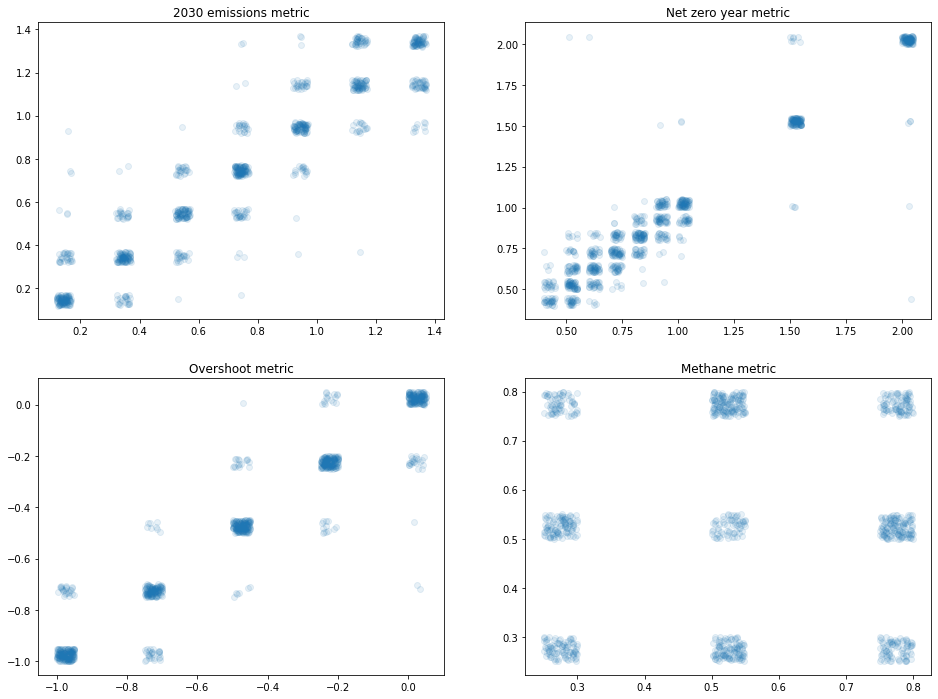

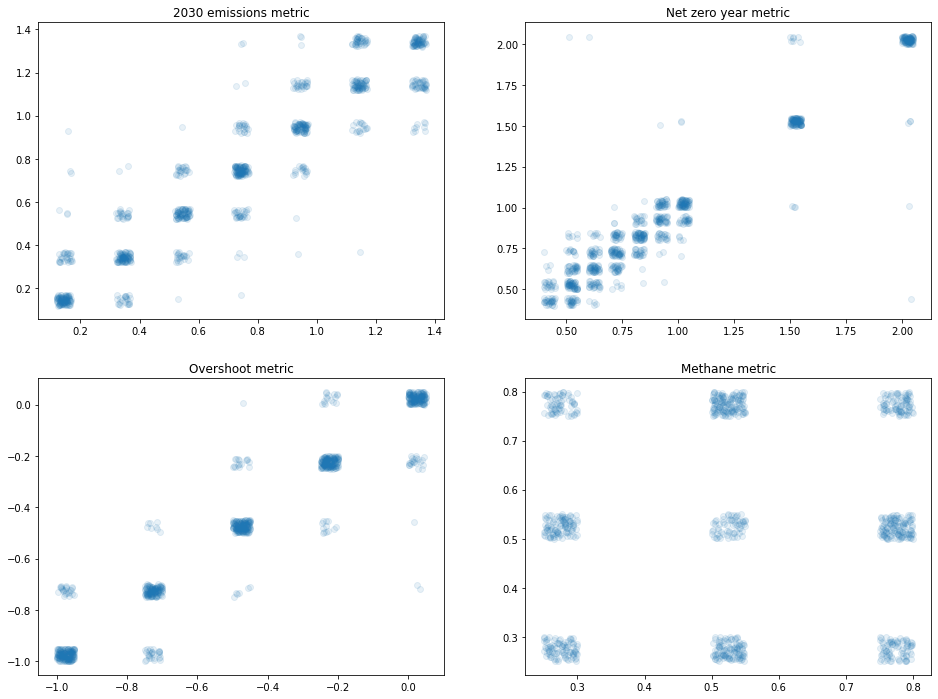

In [21]:
predictions = randforest.predict(pca_test.values)
titles = ["2030 emissions metric", "Net zero year metric", "Overshoot metric", "Methane metric"]
corcoefs = []
plt.figure(figsize=(16, 12))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.scatter(predictions[:, i]+0.05*np.random.rand(len(predictions)), pca_res_test.iloc[:, i]+0.05*np.random.rand(len(predictions)), alpha=0.1)
    plt.title(titles[i])
    corcoefs.append(np.corrcoef(predictions[:, i], pca_res_test.iloc[:, i]))
corcoefs

# Try a polynomial relationship

In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [23]:
# For smaller datasets, 5 polynomial degrees outperforms 6, but not for this dataset
poly = PolynomialFeatures(degree=6)
poly_train = poly.fit_transform(pca_train)
poly_test = poly.fit_transform(pca_test)

In [24]:
pca_train

PCA1      PCA2      PCA3  \
scenario                                                                   
scen_2030fact0.12_nz2040_ov0_meth0.5       -2.107356 -1.623861  0.518272   
scen_2030fact1.32_nz2100_ov-5000_meth0.5    7.963516  1.687641 -0.123958   
scen_2030fact0.52_nz2050_ov-10000_meth0.5  -9.808860  1.416086 -0.380326   
scen_2030fact1.32_nz2060_ov-10000_meth0.5  -2.950792  3.246133  0.256956   
scen_2030fact0.32_nz2200_ov-5000_meth0.5   -4.093134 -2.415950 -0.510034   
...                                              ...       ...       ...   
scen_2030fact1.12_nz2090_ov0_meth0.75       5.061934 -0.320188  0.838836   
scen_2030fact0.32_nz2040_ov-5000_meth0.25  -5.426541  0.268421  0.315306   
scen_2030fact0.72_nz2100_ov-10000_meth0.75 -0.527868  1.983508 -0.950998   
scen_2030fact0.12_nz2060_ov-2500_meth0.5   -1.514114 -0.575675  0.551172   
scen_2030fact0.32_nz2100_ov-2500_meth0.5   -3.285593 -1.366504  0.059299   

                                                PCA4      PCA5  quantile  
scenario                                                                  
scen_2030fact0.12_nz2040_ov0_meth0.5        0.207303 -0.208521      0.66  
scen_2030fact1.32_nz2100_ov-5000_meth0.5   -0.490519 -0.128070      0.50  
scen_2030fact0.52_nz2050_ov-10000_meth0.5   0.165459  0.046273      0.50  
scen_2030fact1.32_nz2060_ov-10000_meth0.5   0.008769  0.165390      0.66  
scen_2030fact0.32_nz2200_ov-5000_meth0.5   -0.021124  0.182482      0.10  
...                                              ...       ...       ...  
scen_2030fact1.12_nz2090_ov0_meth0.75      -0.721938  0.006125      0.33  
scen_2030fact0.32_nz2040_ov-5000_meth0.25   0.676555 -0.283645      0.90  
scen_2030fact0.72_nz2100_ov-10000_meth0.75 -0.103829 -0.246867      0.50  
scen_2030fact0.12_nz2060_ov-2500_meth0.5    0.684069 -0.142814      0.90  
scen_2030fact0.32_nz2100_ov-2500_meth0.5   -0.130218 -0.087861      0.33  

[3600 rows x 6 columns]

PCA1      PCA2      PCA3  \
scenario                                                                   
scen_2030fact0.12_nz2040_ov0_meth0.5       -2.107356 -1.623861  0.518272   
scen_2030fact1.32_nz2100_ov-5000_meth0.5    7.963516  1.687641 -0.123958   
scen_2030fact0.52_nz2050_ov-10000_meth0.5  -9.808860  1.416086 -0.380326   
scen_2030fact1.32_nz2060_ov-10000_meth0.5  -2.950792  3.246133  0.256956   
scen_2030fact0.32_nz2200_ov-5000_meth0.5   -4.093134 -2.415950 -0.510034   
...                                              ...       ...       ...   
scen_2030fact1.12_nz2090_ov0_meth0.75       5.061934 -0.320188  0.838836   
scen_2030fact0.32_nz2040_ov-5000_meth0.25  -5.426541  0.268421  0.315306   
scen_2030fact0.72_nz2100_ov-10000_meth0.75 -0.527868  1.983508 -0.950998   
scen_2030fact0.12_nz2060_ov-2500_meth0.5   -1.514114 -0.575675  0.551172   
scen_2030fact0.32_nz2100_ov-2500_meth0.5   -3.285593 -1.366504  0.059299   

                                                PCA4      PCA5  quantile  
scenario                                                                  
scen_2030fact0.12_nz2040_ov0_meth0.5        0.207303 -0.208521      0.66  
scen_2030fact1.32_nz2100_ov-5000_meth0.5   -0.490519 -0.128070      0.50  
scen_2030fact0.52_nz2050_ov-10000_meth0.5   0.165459  0.046273      0.50  
scen_2030fact1.32_nz2060_ov-10000_meth0.5   0.008769  0.165390      0.66  
scen_2030fact0.32_nz2200_ov-5000_meth0.5   -0.021124  0.182482      0.10  
...                                              ...       ...       ...  
scen_2030fact1.12_nz2090_ov0_meth0.75      -0.721938  0.006125      0.33  
scen_2030fact0.32_nz2040_ov-5000_meth0.25   0.676555 -0.283645      0.90  
scen_2030fact0.72_nz2100_ov-10000_meth0.75 -0.103829 -0.246867      0.50  
scen_2030fact0.12_nz2060_ov-2500_meth0.5    0.684069 -0.142814      0.90  
scen_2030fact0.32_nz2100_ov-2500_meth0.5   -0.130218 -0.087861      0.33  

[3600 rows x 6 columns]

In [25]:
regression = linear_model.LinearRegression()
poly_model = regression.fit(poly_train, pca_res_train)
score = poly_model.score(poly_test, pca_res_test)
score

0.969874021171665

0.969874021171665

In [26]:
poly_test

array([[ 1.00000000e+00, -6.31295590e+00, -1.63092564e+00, ...,
         9.89437831e-07,  9.94704896e-07,  1.00000000e-06],
       [ 1.00000000e+00,  2.76224544e+00,  1.23132344e-02, ...,
         3.48723858e-04, -2.33426868e-03,  1.56250000e-02],
       [ 1.00000000e+00, -8.07445066e+00,  1.89601069e+00, ...,
         1.86555907e-03,  5.39901477e-03,  1.56250000e-02],
       ...,
       [ 1.00000000e+00, -1.05591810e+01,  4.85823637e-02, ...,
         4.72092177e-08,  2.17276823e-07,  1.00000000e-06],
       [ 1.00000000e+00,  7.89734132e+00,  2.26229835e+00, ...,
         6.50047272e-03, -2.31795114e-02,  8.26539500e-02],
       [ 1.00000000e+00, -2.04974855e+00, -1.43607190e+00, ...,
         4.25835646e-08,  2.06357856e-07,  1.00000000e-06]])

array([[ 1.00000000e+00, -6.31295590e+00, -1.63092564e+00, ...,
         9.89437831e-07,  9.94704896e-07,  1.00000000e-06],
       [ 1.00000000e+00,  2.76224544e+00,  1.23132344e-02, ...,
         3.48723858e-04, -2.33426868e-03,  1.56250000e-02],
       [ 1.00000000e+00, -8.07445066e+00,  1.89601069e+00, ...,
         1.86555907e-03,  5.39901477e-03,  1.56250000e-02],
       ...,
       [ 1.00000000e+00, -1.05591810e+01,  4.85823637e-02, ...,
         4.72092177e-08,  2.17276823e-07,  1.00000000e-06],
       [ 1.00000000e+00,  7.89734132e+00,  2.26229835e+00, ...,
         6.50047272e-03, -2.31795114e-02,  8.26539500e-02],
       [ 1.00000000e+00, -2.04974855e+00, -1.43607190e+00, ...,
         4.25835646e-08,  2.06357856e-07,  1.00000000e-06]])

In [27]:
pca_res_test

factor2030  nzreduced  \
scenario                                                            
scen_2030fact0.52_nz2080_ov-2500_meth0.75         0.52        0.8   
scen_2030fact0.52_nz2150_ov-7500_meth0.5          0.52        1.5   
scen_2030fact0.92_nz2050_ov-10000_meth0.5         0.92        0.5   
scen_2030fact0.52_nz2090_ov-7500_meth0.25         0.52        0.9   
scen_2030fact0.32_nz2070_ov-2500_meth0.5          0.32        0.7   
...                                                ...        ...   
scen_2030fact0.92_nz2200_ov-7500_meth0.75         0.92        2.0   
scen_2030fact0.32_nz2060_ov-5000_meth0.25         0.32        0.6   
scen_2030fact0.52_nz2090_ov-10000_meth0.25        0.52        0.9   
scen_2030fact1.12_nz2100_ov-5000_meth0.75         1.12        1.0   
scen_2030fact0.92_nz2100_ov0_meth0.25             0.92        1.0   

                                            overshootreduced  methane  
scenario                                                               
scen_2030fact0.52_nz2080_ov-2500_meth0.75              -0.25     0.75  
scen_2030fact0.52_nz2150_ov-7500_meth0.5               -0.75     0.50  
scen_2030fact0.92_nz2050_ov-10000_meth0.5              -1.00     0.50  
scen_2030fact0.52_nz2090_ov-7500_meth0.25              -0.75     0.25  
scen_2030fact0.32_nz2070_ov-2500_meth0.5               -0.25     0.50  
...                                                      ...      ...  
scen_2030fact0.92_nz2200_ov-7500_meth0.75              -0.75     0.75  
scen_2030fact0.32_nz2060_ov-5000_meth0.25              -0.50     0.25  
scen_2030fact0.52_nz2090_ov-10000_meth0.25             -1.00     0.25  
scen_2030fact1.12_nz2100_ov-5000_meth0.75              -0.50     0.75  
scen_2030fact0.92_nz2100_ov0_meth0.25                   0.00     0.25  

[900 rows x 4 columns]

factor2030  nzreduced  \
scenario                                                            
scen_2030fact0.52_nz2080_ov-2500_meth0.75         0.52        0.8   
scen_2030fact0.52_nz2150_ov-7500_meth0.5          0.52        1.5   
scen_2030fact0.92_nz2050_ov-10000_meth0.5         0.92        0.5   
scen_2030fact0.52_nz2090_ov-7500_meth0.25         0.52        0.9   
scen_2030fact0.32_nz2070_ov-2500_meth0.5          0.32        0.7   
...                                                ...        ...   
scen_2030fact0.92_nz2200_ov-7500_meth0.75         0.92        2.0   
scen_2030fact0.32_nz2060_ov-5000_meth0.25         0.32        0.6   
scen_2030fact0.52_nz2090_ov-10000_meth0.25        0.52        0.9   
scen_2030fact1.12_nz2100_ov-5000_meth0.75         1.12        1.0   
scen_2030fact0.92_nz2100_ov0_meth0.25             0.92        1.0   

                                            overshootreduced  methane  
scenario                                                               
scen_2030fact0.52_nz2080_ov-2500_meth0.75              -0.25     0.75  
scen_2030fact0.52_nz2150_ov-7500_meth0.5               -0.75     0.50  
scen_2030fact0.92_nz2050_ov-10000_meth0.5              -1.00     0.50  
scen_2030fact0.52_nz2090_ov-7500_meth0.25              -0.75     0.25  
scen_2030fact0.32_nz2070_ov-2500_meth0.5               -0.25     0.50  
...                                                      ...      ...  
scen_2030fact0.92_nz2200_ov-7500_meth0.75              -0.75     0.75  
scen_2030fact0.32_nz2060_ov-5000_meth0.25              -0.50     0.25  
scen_2030fact0.52_nz2090_ov-10000_meth0.25             -1.00     0.25  
scen_2030fact1.12_nz2100_ov-5000_meth0.75              -0.50     0.75  
scen_2030fact0.92_nz2100_ov0_meth0.25                   0.00     0.25  

[900 rows x 4 columns]

In [28]:
predicted = poly_model.predict(poly_test)
predicted_labelled = pd.DataFrame(predicted, columns=pca_res_test.columns, index=pca_res_test.index)
predicted_labelled

factor2030  nzreduced  \
scenario                                                            
scen_2030fact0.52_nz2080_ov-2500_meth0.75     0.518818   0.798133   
scen_2030fact0.52_nz2150_ov-7500_meth0.5      0.507791   1.530834   
scen_2030fact0.92_nz2050_ov-10000_meth0.5     0.923008   0.513403   
scen_2030fact0.52_nz2090_ov-7500_meth0.25     0.503441   0.933472   
scen_2030fact0.32_nz2070_ov-2500_meth0.5      0.342328   0.679383   
...                                                ...        ...   
scen_2030fact0.92_nz2200_ov-7500_meth0.75     0.893362   1.982837   
scen_2030fact0.32_nz2060_ov-5000_meth0.25     0.328950   0.635667   
scen_2030fact0.52_nz2090_ov-10000_meth0.25    0.543619   0.883384   
scen_2030fact1.12_nz2100_ov-5000_meth0.75     1.108579   1.025524   
scen_2030fact0.92_nz2100_ov0_meth0.25         0.904272   1.036458   

                                            overshootreduced   methane  
scenario                                                                
scen_2030fact0.52_nz2080_ov-2500_meth0.75          -0.244331  0.709373  
scen_2030fact0.52_nz2150_ov-7500_meth0.5           -0.748640  0.521294  
scen_2030fact0.92_nz2050_ov-10000_meth0.5          -0.994363  0.493510  
scen_2030fact0.52_nz2090_ov-7500_meth0.25          -0.755156  0.250018  
scen_2030fact0.32_nz2070_ov-2500_meth0.5           -0.249254  0.478476  
...                                                      ...       ...  
scen_2030fact0.92_nz2200_ov-7500_meth0.75          -0.740925  0.785374  
scen_2030fact0.32_nz2060_ov-5000_meth0.25          -0.490230  0.272679  
scen_2030fact0.52_nz2090_ov-10000_meth0.25         -0.989592  0.212499  
scen_2030fact1.12_nz2100_ov-5000_meth0.75          -0.508063  0.764467  
scen_2030fact0.92_nz2100_ov0_meth0.25              -0.021655  0.307184  

[900 rows x 4 columns]

factor2030  nzreduced  \
scenario                                                            
scen_2030fact0.52_nz2080_ov-2500_meth0.75     0.518818   0.798133   
scen_2030fact0.52_nz2150_ov-7500_meth0.5      0.507791   1.530834   
scen_2030fact0.92_nz2050_ov-10000_meth0.5     0.923008   0.513403   
scen_2030fact0.52_nz2090_ov-7500_meth0.25     0.503441   0.933472   
scen_2030fact0.32_nz2070_ov-2500_meth0.5      0.342328   0.679383   
...                                                ...        ...   
scen_2030fact0.92_nz2200_ov-7500_meth0.75     0.893362   1.982837   
scen_2030fact0.32_nz2060_ov-5000_meth0.25     0.328950   0.635667   
scen_2030fact0.52_nz2090_ov-10000_meth0.25    0.543619   0.883384   
scen_2030fact1.12_nz2100_ov-5000_meth0.75     1.108579   1.025524   
scen_2030fact0.92_nz2100_ov0_meth0.25         0.904272   1.036458   

                                            overshootreduced   methane  
scenario                                                                
scen_2030fact0.52_nz2080_ov-2500_meth0.75          -0.244331  0.709373  
scen_2030fact0.52_nz2150_ov-7500_meth0.5           -0.748640  0.521294  
scen_2030fact0.92_nz2050_ov-10000_meth0.5          -0.994363  0.493510  
scen_2030fact0.52_nz2090_ov-7500_meth0.25          -0.755156  0.250018  
scen_2030fact0.32_nz2070_ov-2500_meth0.5           -0.249254  0.478476  
...                                                      ...       ...  
scen_2030fact0.92_nz2200_ov-7500_meth0.75          -0.740925  0.785374  
scen_2030fact0.32_nz2060_ov-5000_meth0.25          -0.490230  0.272679  
scen_2030fact0.52_nz2090_ov-10000_meth0.25         -0.989592  0.212499  
scen_2030fact1.12_nz2100_ov-5000_meth0.75          -0.508063  0.764467  
scen_2030fact0.92_nz2100_ov0_meth0.25              -0.021655  0.307184  

[900 rows x 4 columns]

[array([[1.        , 0.99357228],
        [0.99357228, 1.        ]]),
 array([[1.        , 0.99080559],
        [0.99080559, 1.        ]]),
 array([[1.        , 0.99934746],
        [0.99934746, 1.        ]]),
 array([[1.       , 0.9560126],
        [0.9560126, 1.       ]])]

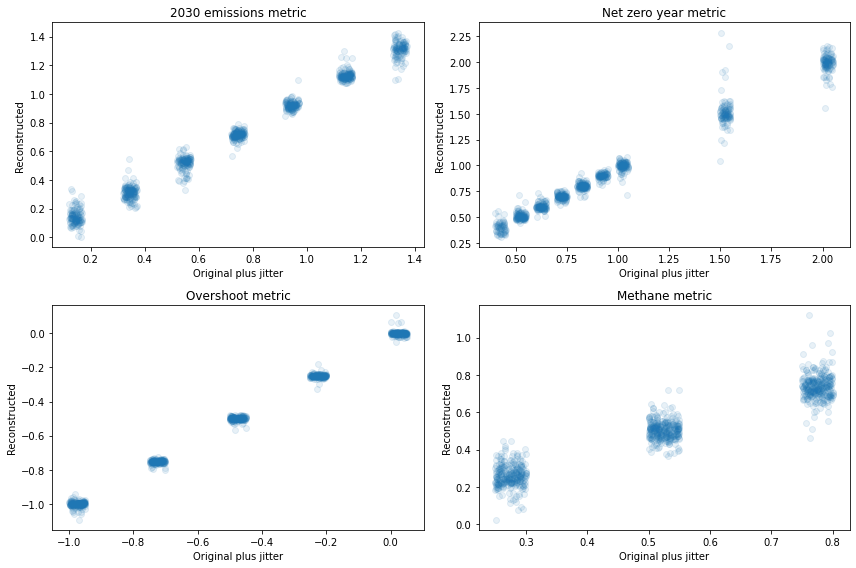

[array([[1.        , 0.99357228],
        [0.99357228, 1.        ]]),
 array([[1.        , 0.99080559],
        [0.99080559, 1.        ]]),
 array([[1.        , 0.99934746],
        [0.99934746, 1.        ]]),
 array([[1.       , 0.9560126],
        [0.9560126, 1.       ]])]

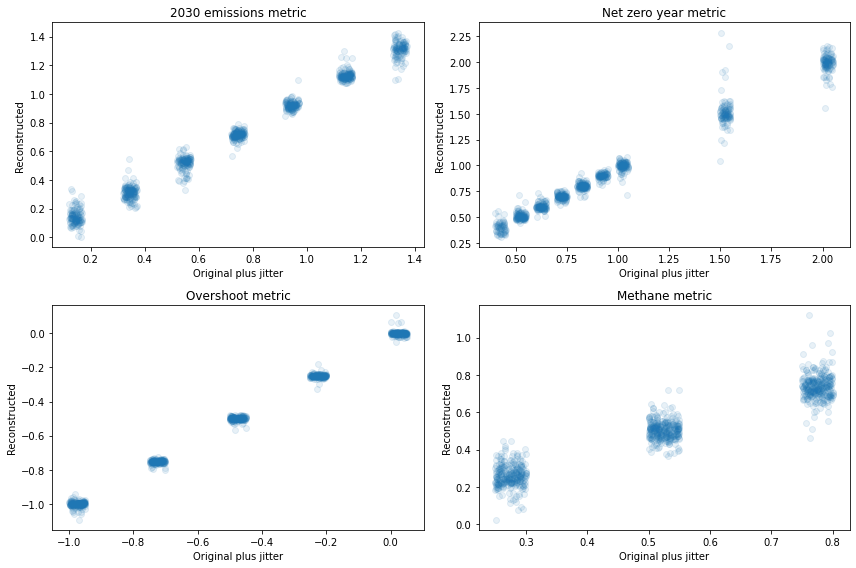

In [29]:
plt.figure(figsize=(12, 8))
corcoefs = []
titles = ["2030 emissions metric", "Net zero year metric", "Overshoot metric", "Methane metric"]
for i in range(4):
    ax=plt.subplot(2, 2, i+1)
    plt.scatter(pca_res_test.iloc[:, i]+0.05*np.random.rand(len(predicted)), predicted[:, i], alpha=0.1)
    plt.title(titles[i])
    plt.xlabel("Original plus jitter")
    plt.ylabel("Reconstructed")
    corcoefs.append(np.corrcoef(pca_res_test.iloc[:, i], predicted[:, i]))
plt.tight_layout()
corcoefs

In [30]:
# Interestingly, if the training data does not include different quantiles, 
# its ability to predict methane substantially declines (within the same quantile), 
# indicating an overtraining risk
q50 = pcadf[pcadf["quantile"] == 0.5].index
q50_test_ind = [i in q50 for i in pca_res_test.index]

[array([[1.        , 0.99357228],
        [0.99357228, 1.        ]]),
 array([[1.        , 0.99080559],
        [0.99080559, 1.        ]]),
 array([[1.        , 0.99934746],
        [0.99934746, 1.        ]]),
 array([[1.       , 0.9560126],
        [0.9560126, 1.       ]])]

[array([[1.        , 0.99357228],
        [0.99357228, 1.        ]]),
 array([[1.        , 0.99080559],
        [0.99080559, 1.        ]]),
 array([[1.        , 0.99934746],
        [0.99934746, 1.        ]]),
 array([[1.       , 0.9560126],
        [0.9560126, 1.       ]])]

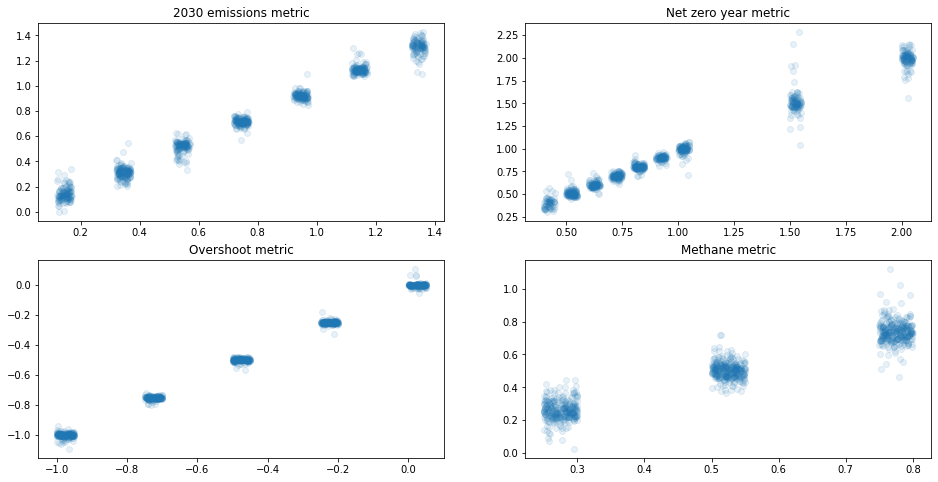

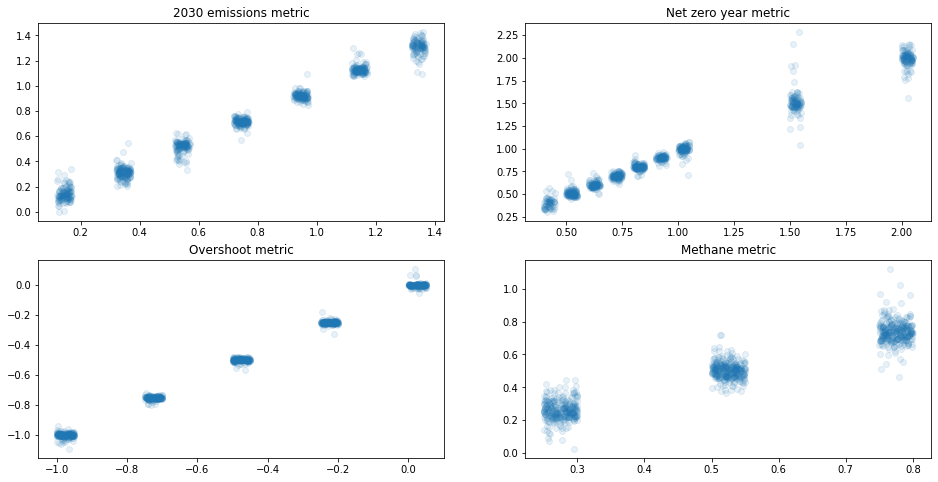

In [31]:
plt.figure(figsize=(16, 8))
corcoefsq5 = []
titles = ["2030 emissions metric", "Net zero year metric", "Overshoot metric", "Methane metric"]
for i in range(4):
    ax=plt.subplot(2, 2, i+1)
    plt.scatter(pca_res_test.iloc[q50_test_ind, i]+0.05*np.random.rand(sum(q50_test_ind)), predicted[q50_test_ind, i], alpha=0.1)
    plt.title(titles[i])
    corcoefsq5.append(np.corrcoef(pca_res_test.iloc[q50_test_ind, i], predicted[q50_test_ind, i]))
corcoefsq5

# Draw diagram of the process going from temperatures to emissions space

In [32]:
sr15_em = pyam.IamDataFrame("../input/complete_sr15_emissions.csv").filter(region="World", variable="*CO2")
scenario = "SSP2-45"
model = "MESSAGE-GLOBIOM 1.0"
basis_scen = sr15_em.filter(model=model, scenario=scenario, year=[2010, 2015, 2020])

pyam.core - INFO: Reading file ..\input\complete_sr15_emissions.csv
pyam.core - INFO: Reading file ..\input\complete_sr15_emissions.csv


In [33]:
# We don't really want a positive overshoot
sum(predicted[:, 2] > 0) / len(predicted)

0.09555555555555556

0.09555555555555556

In [34]:
sum(predicted[:, 2] > 0.01) / len(predicted)

0.0077777777777777776

0.0077777777777777776

In [35]:
nominated_scens = pca_test.iloc[:6, :]
scen = nominated_scens.copy()
quant_to_val = poly_model.predict(poly.fit_transform(scen))

In [36]:
try:
    del all_scens
except NameError:
    pass
yeargap = 10
max_grad = 5000
ind_name = 0
for scen_implied in quant_to_val:
    # Have to convert back from the reduced forms to the originals
    scen = basis_scen.filter(variable="*CO2").timeseries()
    scen[2030] = scen[2020] * scen_implied[0]
    net_zero = scen_implied[1] * 100 + 2000
    overshoot = min(scen_implied[2] * 10000, 0)
    for year in range(2030 + yeargap, int(min(net_zero, 2301)), yeargap):
        scen[year] = scen[2030] * (net_zero - year) / (net_zero - 2030)
    for year in range(int(np.ceil(net_zero/10)) * 10, 2301, yeargap):
        scen[year] = max([overshoot, scen[year - yeargap].values - max_grad])
    scen = scen.reset_index()
    scen = scen.reset_index()
    scen["scenario"] = nominated_scens.index[ind_name]
    ind_name += 1
    try:
        all_scens = all_scens.append(scen)
    except NameError:
        all_scens = scen
del all_scens["index"]
all_scens.head(5)

model                                   scenario region  \
0  MESSAGE-GLOBIOM 1.0  scen_2030fact0.52_nz2080_ov-2500_meth0.75  World   
0  MESSAGE-GLOBIOM 1.0   scen_2030fact0.52_nz2150_ov-7500_meth0.5  World   
0  MESSAGE-GLOBIOM 1.0  scen_2030fact0.92_nz2050_ov-10000_meth0.5  World   
0  MESSAGE-GLOBIOM 1.0  scen_2030fact0.52_nz2090_ov-7500_meth0.25  World   
0  MESSAGE-GLOBIOM 1.0   scen_2030fact0.32_nz2070_ov-2500_meth0.5  World   

        variable       unit         2010         2020          2030  \
0  Emissions|CO2  Mt CO2/yr  40294.29382  42284.92873  21938.198354   
0  Emissions|CO2  Mt CO2/yr  40294.29382  42284.92873  21471.905282   
0  Emissions|CO2  Mt CO2/yr  40294.29382  42284.92873  39029.337895   
0  Emissions|CO2  Mt CO2/yr  40294.29382  42284.92873  21287.952048   
0  Emissions|CO2  Mt CO2/yr  40294.29382  42284.92873  14475.330659   

           2040          2050  ...         2210         2220         2230  \
0  17534.112281  13130.026207  ... -2443.313210 -2443.313210 -2443.313210   
0  19727.404454  17982.903626  ... -7486.401473 -7486.401473 -7486.401473   
0  20740.276824   2451.215754  ... -9943.632365 -9943.632365 -9943.632365   
0  17927.432893  14566.913738  ... -7551.557952 -7551.557952 -7551.557952   
0  10659.833931   6844.337204  ... -2492.544417 -2492.544417 -2492.544417   

          2240         2250         2260         2270         2280  \
0 -2443.313210 -2443.313210 -2443.313210 -2443.313210 -2443.313210   
0 -7486.401473 -7486.401473 -7486.401473 -7486.401473 -7486.401473   
0 -9943.632365 -9943.632365 -9943.632365 -9943.632365 -9943.632365   
0 -7551.557952 -7551.557952 -7551.557952 -7551.557952 -7551.557952   
0 -2492.544417 -2492.544417 -2492.544417 -2492.544417 -2492.544417   

          2290         2300  
0 -2443.313210 -2443.313210  
0 -7486.401473 -7486.401473  
0 -9943.632365 -9943.632365  
0 -7551.557952 -7551.557952  
0 -2492.544417 -2492.544417  

[5 rows x 35 columns]

model                                   scenario region  \
0  MESSAGE-GLOBIOM 1.0  scen_2030fact0.52_nz2080_ov-2500_meth0.75  World   
0  MESSAGE-GLOBIOM 1.0   scen_2030fact0.52_nz2150_ov-7500_meth0.5  World   
0  MESSAGE-GLOBIOM 1.0  scen_2030fact0.92_nz2050_ov-10000_meth0.5  World   
0  MESSAGE-GLOBIOM 1.0  scen_2030fact0.52_nz2090_ov-7500_meth0.25  World   
0  MESSAGE-GLOBIOM 1.0   scen_2030fact0.32_nz2070_ov-2500_meth0.5  World   

        variable       unit         2010         2020          2030  \
0  Emissions|CO2  Mt CO2/yr  40294.29382  42284.92873  21938.198354   
0  Emissions|CO2  Mt CO2/yr  40294.29382  42284.92873  21471.905282   
0  Emissions|CO2  Mt CO2/yr  40294.29382  42284.92873  39029.337895   
0  Emissions|CO2  Mt CO2/yr  40294.29382  42284.92873  21287.952048   
0  Emissions|CO2  Mt CO2/yr  40294.29382  42284.92873  14475.330659   

           2040          2050  ...         2210         2220         2230  \
0  17534.112281  13130.026207  ... -2443.313210 -2443.313210 -2443.313210   
0  19727.404454  17982.903626  ... -7486.401473 -7486.401473 -7486.401473   
0  20740.276824   2451.215754  ... -9943.632365 -9943.632365 -9943.632365   
0  17927.432893  14566.913738  ... -7551.557952 -7551.557952 -7551.557952   
0  10659.833931   6844.337204  ... -2492.544417 -2492.544417 -2492.544417   

          2240         2250         2260         2270         2280  \
0 -2443.313210 -2443.313210 -2443.313210 -2443.313210 -2443.313210   
0 -7486.401473 -7486.401473 -7486.401473 -7486.401473 -7486.401473   
0 -9943.632365 -9943.632365 -9943.632365 -9943.632365 -9943.632365   
0 -7551.557952 -7551.557952 -7551.557952 -7551.557952 -7551.557952   
0 -2492.544417 -2492.544417 -2492.544417 -2492.544417 -2492.544417   

          2290         2300  
0 -2443.313210 -2443.313210  
0 -7486.401473 -7486.401473  
0 -9943.632365 -9943.632365  
0 -7551.557952 -7551.557952  
0 -2492.544417 -2492.544417  

[5 rows x 35 columns]

In [37]:
decode_scen(pd.DataFrame({"scenario": nominated_scens.index}))

scenario  factor2030  nzdate  overshoot  \
0  scen_2030fact0.52_nz2080_ov-2500_meth0.75        0.52    2080    -2500.0   
1   scen_2030fact0.52_nz2150_ov-7500_meth0.5        0.52    2150    -7500.0   
2  scen_2030fact0.92_nz2050_ov-10000_meth0.5        0.92    2050   -10000.0   
3  scen_2030fact0.52_nz2090_ov-7500_meth0.25        0.52    2090    -7500.0   
4   scen_2030fact0.32_nz2070_ov-2500_meth0.5        0.32    2070    -2500.0   
5  scen_2030fact0.92_nz2100_ov-5000_meth0.25        0.92    2100    -5000.0   

   methane  nzreduced  overshootreduced  
0     0.75        0.8             -0.25  
1     0.50        1.5             -0.75  
2     0.50        0.5             -1.00  
3     0.25        0.9             -0.75  
4     0.50        0.7             -0.25  
5     0.25        1.0             -0.50

scenario  factor2030  nzdate  overshoot  \
0  scen_2030fact0.52_nz2080_ov-2500_meth0.75        0.52    2080    -2500.0   
1   scen_2030fact0.52_nz2150_ov-7500_meth0.5        0.52    2150    -7500.0   
2  scen_2030fact0.92_nz2050_ov-10000_meth0.5        0.92    2050   -10000.0   
3  scen_2030fact0.52_nz2090_ov-7500_meth0.25        0.52    2090    -7500.0   
4   scen_2030fact0.32_nz2070_ov-2500_meth0.5        0.32    2070    -2500.0   
5  scen_2030fact0.92_nz2100_ov-5000_meth0.25        0.92    2100    -5000.0   

   methane  nzreduced  overshootreduced  
0     0.75        0.8             -0.25  
1     0.50        1.5             -0.75  
2     0.50        0.5             -1.00  
3     0.25        0.9             -0.75  
4     0.50        0.7             -0.25  
5     0.25        1.0             -0.50

In [38]:
try:
    del all_scens_orig
except NameError:
    pass
yeargap = 10
max_grad = 5000
ind_name = 0
for ind, scen_implied in decode_scen(pd.DataFrame({"scenario": nominated_scens.index})).iterrows():
    # Have to convert back from the reduced forms to the originals
    scen = basis_scen.filter(variable="*CO2").timeseries()
    scen[2030] = scen[2020] * scen_implied["factor2030"]
    net_zero = scen_implied["nzdate"]
    overshoot = scen_implied["overshoot"]
    for year in range(2030 + yeargap, min(net_zero + 1, 2301), yeargap):
        scen[year] = scen[2030] * (net_zero - year) / (net_zero - 2030)
    for year in range(net_zero + yeargap, 2301, yeargap):
        scen[year] = max([overshoot, scen[year - yeargap].values - max_grad])
    scen = scen.reset_index()
    scen = scen.reset_index()
    scen["scenario"] = scen_implied["scenario"]
    try:
        all_scens_orig = all_scens_orig.append(scen)
    except NameError:
        all_scens_orig = scen
del all_scens_orig["index"]
all_scens_orig.head(5)

model                                   scenario region  \
0  MESSAGE-GLOBIOM 1.0  scen_2030fact0.52_nz2080_ov-2500_meth0.75  World   
0  MESSAGE-GLOBIOM 1.0   scen_2030fact0.52_nz2150_ov-7500_meth0.5  World   
0  MESSAGE-GLOBIOM 1.0  scen_2030fact0.92_nz2050_ov-10000_meth0.5  World   
0  MESSAGE-GLOBIOM 1.0  scen_2030fact0.52_nz2090_ov-7500_meth0.25  World   
0  MESSAGE-GLOBIOM 1.0   scen_2030fact0.32_nz2070_ov-2500_meth0.5  World   

        variable       unit         2010         2020          2030  \
0  Emissions|CO2  Mt CO2/yr  40294.29382  42284.92873  21988.162940   
0  Emissions|CO2  Mt CO2/yr  40294.29382  42284.92873  21988.162940   
0  Emissions|CO2  Mt CO2/yr  40294.29382  42284.92873  38902.134432   
0  Emissions|CO2  Mt CO2/yr  40294.29382  42284.92873  21988.162940   
0  Emissions|CO2  Mt CO2/yr  40294.29382  42284.92873  13531.177194   

           2040          2050  ...     2210     2220     2230     2240  \
0  17590.530352  13192.897764  ...  -2500.0  -2500.0  -2500.0  -2500.0   
0  20155.816028  18323.469116  ...  -7500.0  -7500.0  -7500.0  -7500.0   
0  19451.067216      0.000000  ... -10000.0 -10000.0 -10000.0 -10000.0   
0  18323.469116  14658.775293  ...  -7500.0  -7500.0  -7500.0  -7500.0   
0  10148.382895   6765.588597  ...  -2500.0  -2500.0  -2500.0  -2500.0   

      2250     2260     2270     2280     2290     2300  
0  -2500.0  -2500.0  -2500.0  -2500.0  -2500.0  -2500.0  
0  -7500.0  -7500.0  -7500.0  -7500.0  -7500.0  -7500.0  
0 -10000.0 -10000.0 -10000.0 -10000.0 -10000.0 -10000.0  
0  -7500.0  -7500.0  -7500.0  -7500.0  -7500.0  -7500.0  
0  -2500.0  -2500.0  -2500.0  -2500.0  -2500.0  -2500.0  

[5 rows x 35 columns]

model                                   scenario region  \
0  MESSAGE-GLOBIOM 1.0  scen_2030fact0.52_nz2080_ov-2500_meth0.75  World   
0  MESSAGE-GLOBIOM 1.0   scen_2030fact0.52_nz2150_ov-7500_meth0.5  World   
0  MESSAGE-GLOBIOM 1.0  scen_2030fact0.92_nz2050_ov-10000_meth0.5  World   
0  MESSAGE-GLOBIOM 1.0  scen_2030fact0.52_nz2090_ov-7500_meth0.25  World   
0  MESSAGE-GLOBIOM 1.0   scen_2030fact0.32_nz2070_ov-2500_meth0.5  World   

        variable       unit         2010         2020          2030  \
0  Emissions|CO2  Mt CO2/yr  40294.29382  42284.92873  21988.162940   
0  Emissions|CO2  Mt CO2/yr  40294.29382  42284.92873  21988.162940   
0  Emissions|CO2  Mt CO2/yr  40294.29382  42284.92873  38902.134432   
0  Emissions|CO2  Mt CO2/yr  40294.29382  42284.92873  21988.162940   
0  Emissions|CO2  Mt CO2/yr  40294.29382  42284.92873  13531.177194   

           2040          2050  ...     2210     2220     2230     2240  \
0  17590.530352  13192.897764  ...  -2500.0  -2500.0  -2500.0  -2500.0   
0  20155.816028  18323.469116  ...  -7500.0  -7500.0  -7500.0  -7500.0   
0  19451.067216      0.000000  ... -10000.0 -10000.0 -10000.0 -10000.0   
0  18323.469116  14658.775293  ...  -7500.0  -7500.0  -7500.0  -7500.0   
0  10148.382895   6765.588597  ...  -2500.0  -2500.0  -2500.0  -2500.0   

      2250     2260     2270     2280     2290     2300  
0  -2500.0  -2500.0  -2500.0  -2500.0  -2500.0  -2500.0  
0  -7500.0  -7500.0  -7500.0  -7500.0  -7500.0  -7500.0  
0 -10000.0 -10000.0 -10000.0 -10000.0 -10000.0 -10000.0  
0  -7500.0  -7500.0  -7500.0  -7500.0  -7500.0  -7500.0  
0  -2500.0  -2500.0  -2500.0  -2500.0  -2500.0  -2500.0  

[5 rows x 35 columns]

In [39]:
reconstructed = pyam.IamDataFrame(all_scens)

In [40]:
orig = pyam.IamDataFrame(all_scens_orig)

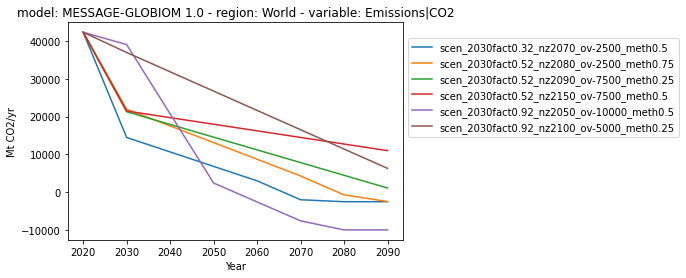

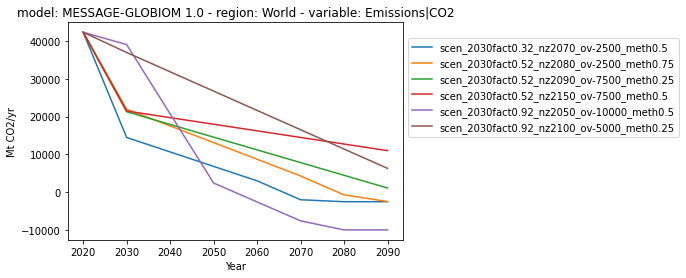

In [41]:
reconstructed.filter(year=[2020, 2030, 2040, 2050, 2060, 2070, 2080, 2090]).plot()
plt.legend(bbox_to_anchor=(1.0, .95))

<AxesSubplot:title={'center':'model: MESSAGE-GLOBIOM 1.0 - region: World - variable: Emissions|CO2'}, xlabel='Year', ylabel='Mt CO2/yr'>

<AxesSubplot:title={'center':'model: MESSAGE-GLOBIOM 1.0 - region: World - variable: Emissions|CO2'}, xlabel='Year', ylabel='Mt CO2/yr'>

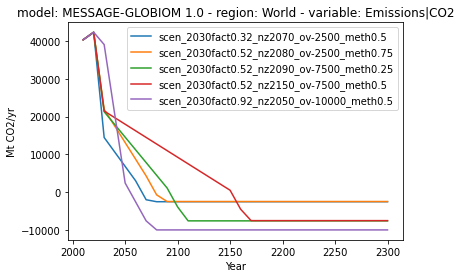

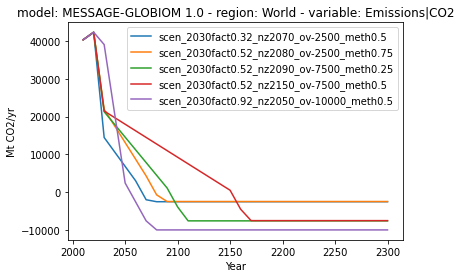

In [42]:
reconstructed.filter(scenario=predicted_labelled.index[:5]).plot()

<AxesSubplot:title={'center':'model: MESSAGE-GLOBIOM 1.0 - region: World - variable: Emissions|CO2'}, xlabel='Year', ylabel='Mt CO2/yr'>

<AxesSubplot:title={'center':'model: MESSAGE-GLOBIOM 1.0 - region: World - variable: Emissions|CO2'}, xlabel='Year', ylabel='Mt CO2/yr'>

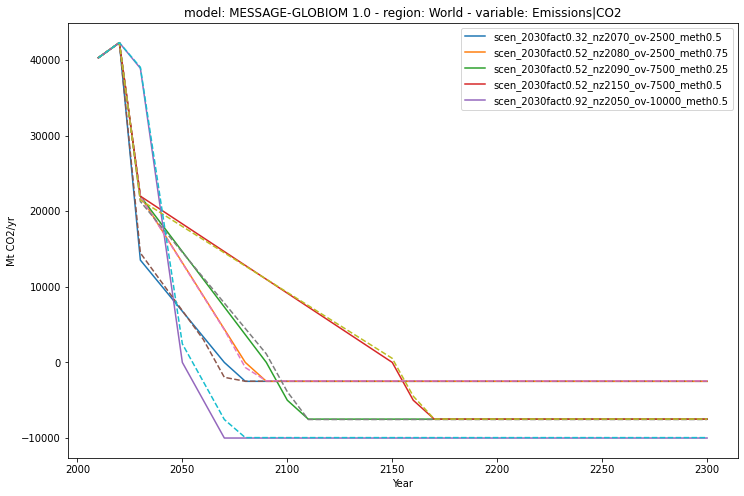

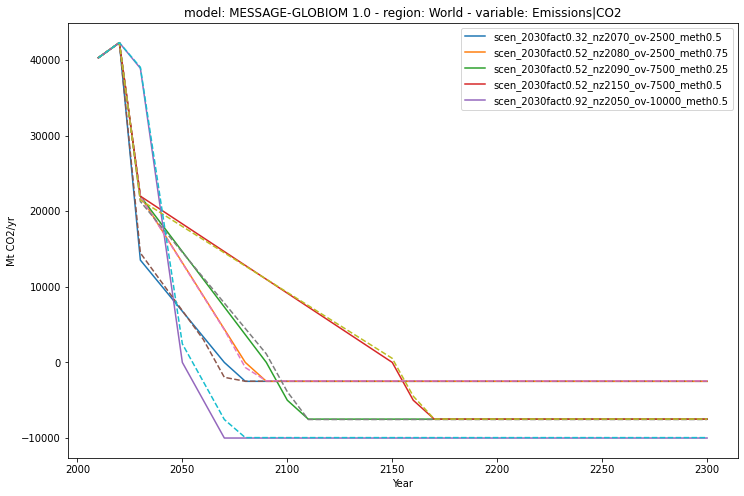

In [43]:
plt.figure(figsize=(12, 8))
ax = plt.subplot()
orig.filter(scenario=predicted_labelled.index[:5]).plot(ax=ax)
reconstructed.filter(scenario=predicted_labelled.index[:5]).plot(ax=ax, linestyle="--")

<AxesSubplot:title={'center':'model: MESSAGE-GLOBIOM 1.0 - region: World - variable: Emissions|CO2'}, xlabel='Year', ylabel='Mt CO2/yr'>

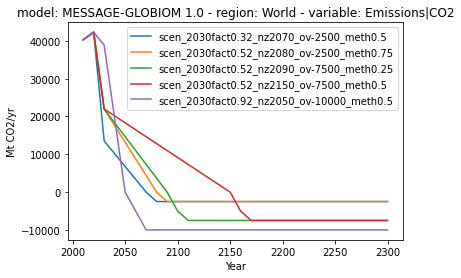

<AxesSubplot:title={'center':'model: MESSAGE-GLOBIOM 1.0 - region: World - variable: Emissions|CO2'}, xlabel='Year', ylabel='Mt CO2/yr'>

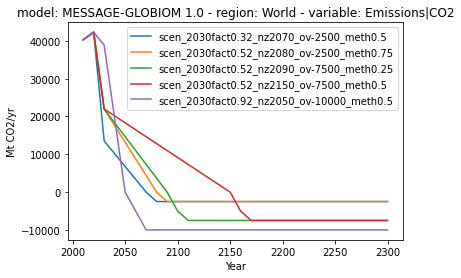

In [44]:
orig.filter(scenario=predicted_labelled.index[:5]).plot()

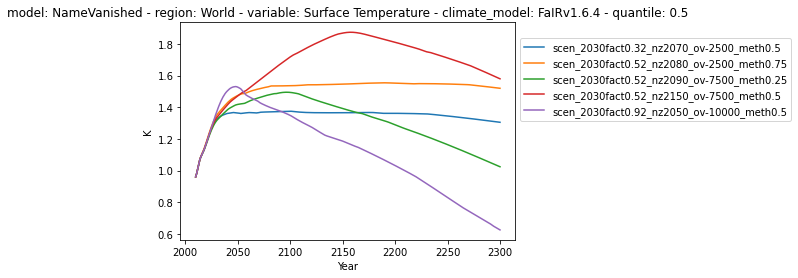

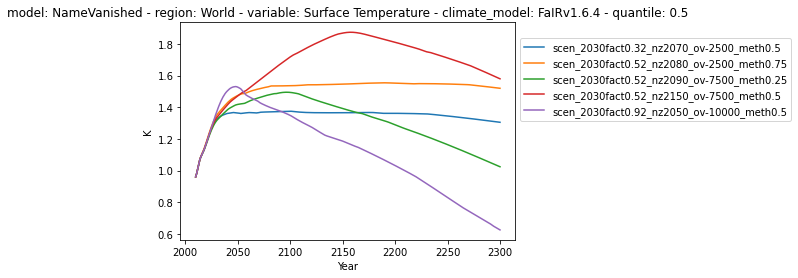

In [45]:
temps_py.filter(scenario=predicted_labelled.index[:5], quantile=0.5).plot()
plt.legend(bbox_to_anchor=(1.0, .95))

In [46]:
pca_test

PCA1      PCA2      PCA3  \
scenario                                                                    
scen_2030fact0.52_nz2080_ov-2500_meth0.75   -6.312956 -1.630926  0.083025   
scen_2030fact0.52_nz2150_ov-7500_meth0.5     2.762245  0.012313 -1.098490   
scen_2030fact0.92_nz2050_ov-10000_meth0.5   -8.074451  1.896011 -0.205361   
scen_2030fact0.52_nz2090_ov-7500_meth0.25   -3.155468  1.173413 -0.460684   
scen_2030fact0.32_nz2070_ov-2500_meth0.5    -3.173959 -0.859505  0.167578   
...                                               ...       ...       ...   
scen_2030fact0.92_nz2200_ov-7500_meth0.75   18.021742 -1.566223 -1.137211   
scen_2030fact0.32_nz2060_ov-5000_meth0.25   -3.659546  0.484621  0.251617   
scen_2030fact0.52_nz2090_ov-10000_meth0.25 -10.559181  0.048582 -0.904312   
scen_2030fact1.12_nz2100_ov-5000_meth0.75    7.897341  2.262298 -0.007917   
scen_2030fact0.92_nz2100_ov0_meth0.25       -2.049749 -1.436072  0.196400   

                                                PCA4      PCA5  quantile  
scenario                                                                  
scen_2030fact0.52_nz2080_ov-2500_meth0.75  -0.329189  0.099470      0.10  
scen_2030fact0.52_nz2150_ov-7500_meth0.5    0.276681 -0.074697      0.50  
scen_2030fact0.92_nz2050_ov-10000_meth0.5   0.210488  0.172768      0.50  
scen_2030fact0.52_nz2090_ov-7500_meth0.25  -0.043596 -0.257761      0.66  
scen_2030fact0.32_nz2070_ov-2500_meth0.5   -0.010793 -0.135991      0.50  
...                                              ...       ...       ...  
scen_2030fact0.92_nz2200_ov-7500_meth0.75   0.601926  0.473130      0.50  
scen_2030fact0.32_nz2060_ov-5000_meth0.25   0.623918 -0.145677      0.90  
scen_2030fact0.52_nz2090_ov-10000_meth0.25 -0.274340  0.021728      0.10  
scen_2030fact1.12_nz2100_ov-5000_meth0.75  -0.381762 -0.185091      0.66  
scen_2030fact0.92_nz2100_ov0_meth0.25      -0.598007  0.020636      0.10  

[900 rows x 6 columns]

PCA1      PCA2      PCA3  \
scenario                                                                    
scen_2030fact0.52_nz2080_ov-2500_meth0.75   -6.312956 -1.630926  0.083025   
scen_2030fact0.52_nz2150_ov-7500_meth0.5     2.762245  0.012313 -1.098490   
scen_2030fact0.92_nz2050_ov-10000_meth0.5   -8.074451  1.896011 -0.205361   
scen_2030fact0.52_nz2090_ov-7500_meth0.25   -3.155468  1.173413 -0.460684   
scen_2030fact0.32_nz2070_ov-2500_meth0.5    -3.173959 -0.859505  0.167578   
...                                               ...       ...       ...   
scen_2030fact0.92_nz2200_ov-7500_meth0.75   18.021742 -1.566223 -1.137211   
scen_2030fact0.32_nz2060_ov-5000_meth0.25   -3.659546  0.484621  0.251617   
scen_2030fact0.52_nz2090_ov-10000_meth0.25 -10.559181  0.048582 -0.904312   
scen_2030fact1.12_nz2100_ov-5000_meth0.75    7.897341  2.262298 -0.007917   
scen_2030fact0.92_nz2100_ov0_meth0.25       -2.049749 -1.436072  0.196400   

                                                PCA4      PCA5  quantile  
scenario                                                                  
scen_2030fact0.52_nz2080_ov-2500_meth0.75  -0.329189  0.099470      0.10  
scen_2030fact0.52_nz2150_ov-7500_meth0.5    0.276681 -0.074697      0.50  
scen_2030fact0.92_nz2050_ov-10000_meth0.5   0.210488  0.172768      0.50  
scen_2030fact0.52_nz2090_ov-7500_meth0.25  -0.043596 -0.257761      0.66  
scen_2030fact0.32_nz2070_ov-2500_meth0.5   -0.010793 -0.135991      0.50  
...                                              ...       ...       ...  
scen_2030fact0.92_nz2200_ov-7500_meth0.75   0.601926  0.473130      0.50  
scen_2030fact0.32_nz2060_ov-5000_meth0.25   0.623918 -0.145677      0.90  
scen_2030fact0.52_nz2090_ov-10000_meth0.25 -0.274340  0.021728      0.10  
scen_2030fact1.12_nz2100_ov-5000_meth0.75  -0.381762 -0.185091      0.66  
scen_2030fact0.92_nz2100_ov0_meth0.25      -0.598007  0.020636      0.10  

[900 rows x 6 columns]

# Attempt to map across different quantiles

In [47]:
dif_quant_test = pca_test.copy()
dif_quant_test["quantile"] = 0.5

In [48]:
pca_res_test

factor2030  nzreduced  \
scenario                                                            
scen_2030fact0.52_nz2080_ov-2500_meth0.75         0.52        0.8   
scen_2030fact0.52_nz2150_ov-7500_meth0.5          0.52        1.5   
scen_2030fact0.92_nz2050_ov-10000_meth0.5         0.92        0.5   
scen_2030fact0.52_nz2090_ov-7500_meth0.25         0.52        0.9   
scen_2030fact0.32_nz2070_ov-2500_meth0.5          0.32        0.7   
...                                                ...        ...   
scen_2030fact0.92_nz2200_ov-7500_meth0.75         0.92        2.0   
scen_2030fact0.32_nz2060_ov-5000_meth0.25         0.32        0.6   
scen_2030fact0.52_nz2090_ov-10000_meth0.25        0.52        0.9   
scen_2030fact1.12_nz2100_ov-5000_meth0.75         1.12        1.0   
scen_2030fact0.92_nz2100_ov0_meth0.25             0.92        1.0   

                                            overshootreduced  methane  
scenario                                                               
scen_2030fact0.52_nz2080_ov-2500_meth0.75              -0.25     0.75  
scen_2030fact0.52_nz2150_ov-7500_meth0.5               -0.75     0.50  
scen_2030fact0.92_nz2050_ov-10000_meth0.5              -1.00     0.50  
scen_2030fact0.52_nz2090_ov-7500_meth0.25              -0.75     0.25  
scen_2030fact0.32_nz2070_ov-2500_meth0.5               -0.25     0.50  
...                                                      ...      ...  
scen_2030fact0.92_nz2200_ov-7500_meth0.75              -0.75     0.75  
scen_2030fact0.32_nz2060_ov-5000_meth0.25              -0.50     0.25  
scen_2030fact0.52_nz2090_ov-10000_meth0.25             -1.00     0.25  
scen_2030fact1.12_nz2100_ov-5000_meth0.75              -0.50     0.75  
scen_2030fact0.92_nz2100_ov0_meth0.25                   0.00     0.25  

[900 rows x 4 columns]

factor2030  nzreduced  \
scenario                                                            
scen_2030fact0.52_nz2080_ov-2500_meth0.75         0.52        0.8   
scen_2030fact0.52_nz2150_ov-7500_meth0.5          0.52        1.5   
scen_2030fact0.92_nz2050_ov-10000_meth0.5         0.92        0.5   
scen_2030fact0.52_nz2090_ov-7500_meth0.25         0.52        0.9   
scen_2030fact0.32_nz2070_ov-2500_meth0.5          0.32        0.7   
...                                                ...        ...   
scen_2030fact0.92_nz2200_ov-7500_meth0.75         0.92        2.0   
scen_2030fact0.32_nz2060_ov-5000_meth0.25         0.32        0.6   
scen_2030fact0.52_nz2090_ov-10000_meth0.25        0.52        0.9   
scen_2030fact1.12_nz2100_ov-5000_meth0.75         1.12        1.0   
scen_2030fact0.92_nz2100_ov0_meth0.25             0.92        1.0   

                                            overshootreduced  methane  
scenario                                                               
scen_2030fact0.52_nz2080_ov-2500_meth0.75              -0.25     0.75  
scen_2030fact0.52_nz2150_ov-7500_meth0.5               -0.75     0.50  
scen_2030fact0.92_nz2050_ov-10000_meth0.5              -1.00     0.50  
scen_2030fact0.52_nz2090_ov-7500_meth0.25              -0.75     0.25  
scen_2030fact0.32_nz2070_ov-2500_meth0.5               -0.25     0.50  
...                                                      ...      ...  
scen_2030fact0.92_nz2200_ov-7500_meth0.75              -0.75     0.75  
scen_2030fact0.32_nz2060_ov-5000_meth0.25              -0.50     0.25  
scen_2030fact0.52_nz2090_ov-10000_meth0.25             -1.00     0.25  
scen_2030fact1.12_nz2100_ov-5000_meth0.75              -0.50     0.75  
scen_2030fact0.92_nz2100_ov0_meth0.25                   0.00     0.25  

[900 rows x 4 columns]

In [49]:
wrong_quant_pred = poly_model.predict(poly.fit_transform(dif_quant_test))

[array([[1.        , 0.14366066],
        [0.14366066, 1.        ]]),
 array([[1.        , 0.25354204],
        [0.25354204, 1.        ]]),
 array([[1.        , 0.16517307],
        [0.16517307, 1.        ]]),
 array([[ 1.        , -0.00930963],
        [-0.00930963,  1.        ]])]

[array([[1.        , 0.14366066],
        [0.14366066, 1.        ]]),
 array([[1.        , 0.25354204],
        [0.25354204, 1.        ]]),
 array([[1.        , 0.16517307],
        [0.16517307, 1.        ]]),
 array([[ 1.        , -0.00930963],
        [-0.00930963,  1.        ]])]

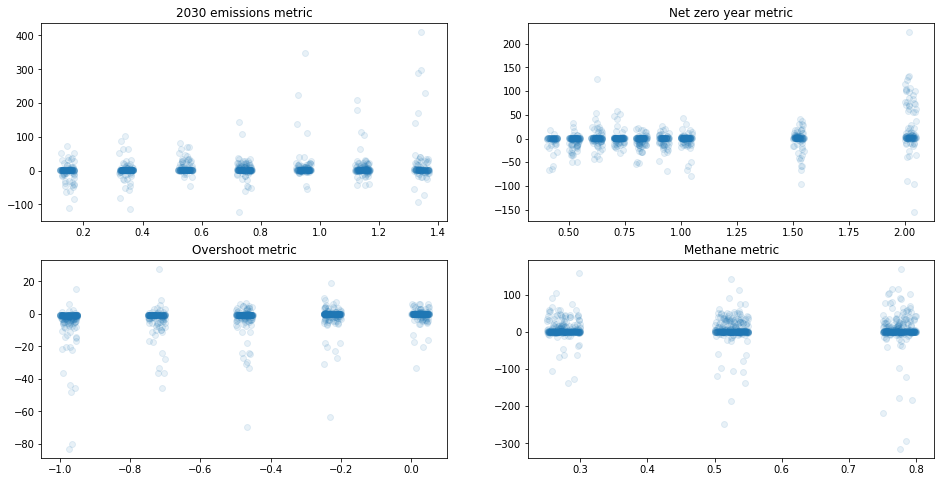

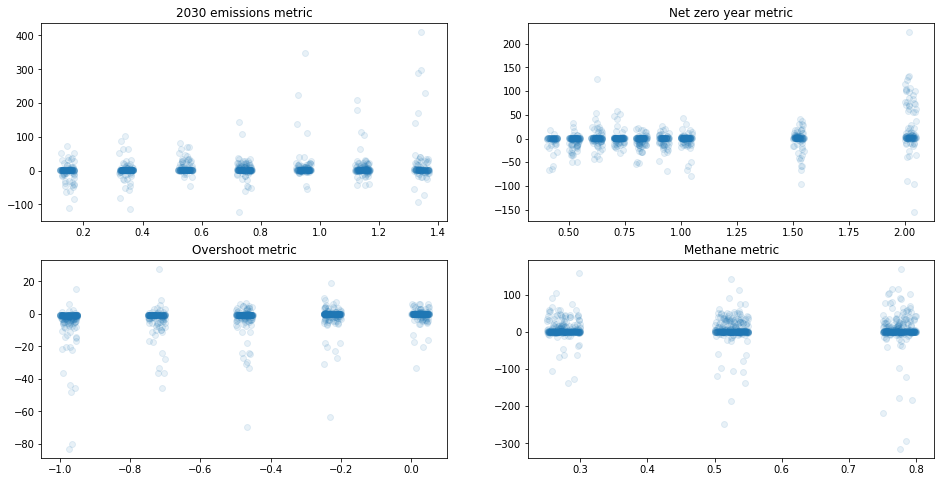

In [50]:
plt.figure(figsize=(16, 8))
corcoefsq5 = []
titles = ["2030 emissions metric", "Net zero year metric", "Overshoot metric", "Methane metric"]
for i in range(4):
    ax=plt.subplot(2, 2, i+1)
    plt.scatter(pca_res_test.iloc[:, i]+0.05*np.random.rand(len(pca_res_test)), wrong_quant_pred [:, i], alpha=0.1)
    plt.title(titles[i])
    corcoefsq5.append(np.corrcoef(pca_res_test.iloc[:, i], wrong_quant_pred [:, i]))
corcoefsq5

In [51]:
maxes = pca_res_test.max()
mins = pca_res_test.min()

In [151]:
def calc_wrong_fraction(npa, mins, maxes):
    wrong_fraction = pd.Series(index=range(npa.shape[1]), data = np.nan)
    for i in range(npa.shape[1]):
        wrong_fraction[i] = sum(
            (npa[:, i] > maxes[i]) | (npa[:, i] < mins[i])
        ) / len(npa)
    all_wrong_fraction = sum(
        (npa[:, 0] > maxes[0] * 1.5) | (npa[:, 0] < mins[0] * 0.5) |
        (npa[:, 1] > maxes[1] * 1.5) | (npa[:, 1] < mins[1] * 0.5) |
        (npa[:, 2] > maxes[2] * 0.5) | (npa[:, 2] < mins[2] * 1.5) |
        (npa[:, 3] > maxes[3] * 1.5) | (npa[:, 3] < mins[3] * 0.5) 
    ) / len(npa)
    return (all_wrong_fraction, wrong_fraction)

In [152]:
(all_wrong_fraction, wrong_fraction) = calc_wrong_fraction(wrong_quant_pred, mins, maxes)
print(all_wrong_fraction)
print(wrong_fraction)

0.7466666666666667
0    0.570000
1    0.647778
2    0.504444
3    0.794444
dtype: float64
0.7466666666666667
0    0.570000
1    0.647778
2    0.504444
3    0.794444
dtype: float64


In [156]:
(all_wrong_fraction, wrong_fraction) = calc_wrong_fraction(predicted, mins, maxes)
print(all_wrong_fraction)
print(wrong_fraction)

0.10666666666666667
0    0.102222
1    0.095556
2    0.198889
3    0.275556
dtype: float64
0.10666666666666667
0    0.102222
1    0.095556
2    0.198889
3    0.275556
dtype: float64


## Attempt via resolution into PCA of the corresponding quantile
Unfortunately the accuracy of the single-quantile decomposition is poor

In [71]:
temp_train = {}
temp_test = {}
temp_res_train = {}
temp_res_test = {}
for quantile in quantiles + ["all"]:
    if quantile != "all":
        temp_quant = decode_scen(temps.loc[temps["quantile"]==quantile,:].copy())
    else:
        temp_quant = decode_scen(temps)
    temp_train[quantile], temp_test[quantile], temp_res_train[quantile], temp_res_test[quantile] = train_test_split(
        temp_quant.loc[:, temps.columns[6:-6]], 
        temp_quant.loc[:, functional_cols], test_size = 0.2, random_state = 4
    )
    

In [119]:
quant_to_inv = 0.66
poly_2 = PolynomialFeatures(degree=2)
temp_to_train = decomposers5[quant_to_inv].fit_transform(temp_train[quant_to_inv].iloc[:, 1:])
temp_to_train = np.c_[temp_to_train, temp_train[quant_to_inv].loc[:, "quantile"].values]

temp_to_test = decomposers5[quant_to_inv].fit_transform(temp_test[quant_to_inv].iloc[:, 1:])
temp_to_test = np.c_[temp_to_test, temp_test[quant_to_inv].loc[:, "quantile"].values]
poly_model = regression.fit(
    poly_2.fit_transform(temp_to_train), temp_res_train[quant_to_inv]
)
score = poly_model.score(
    poly_2.fit_transform(temp_to_test), temp_res_test[quant_to_inv]
)
score

0.7954202031941232

0.7954202031941232

In [128]:
quant_to_inv = 0.33
temp_to_train = decomposers5[quant_to_inv].fit_transform(temp_train[quant_to_inv].iloc[:, 1:])
temp_to_train = np.c_[temp_to_train, temp_train[quant_to_inv].loc[:, "quantile"].values]

temp_to_test = decomposers5[quant_to_inv].fit_transform(temp_test[quant_to_inv].iloc[:, 1:])
temp_to_test = np.c_[temp_to_test, temp_test[quant_to_inv].loc[:, "quantile"].values]
poly_model = regression.fit(
    poly_2.fit_transform(temp_to_train), temp_res_train[quant_to_inv]
)
score = poly_model.score(
    poly_2.fit_transform(temp_to_test), temp_res_test[quant_to_inv]
)
score

0.7588491059311961

0.7588491059311961

In [129]:
poly_model

In [145]:
true_quant = 0.66
false_quant = quant_to_inv
assert true_quant != false_quant
wrong_quant_pcas = decomposers5[false_quant].fit_transform(temp_test[true_quant].iloc[:, 1:])
wrong_quant_pcas = np.c_[wrong_quant_pcas, false_quant * np.ones((len(wrong_quant_pcas), 1))]
wrong_quant_results = poly_model.predict( poly_2.fit_transform(wrong_quant_pcas))

In [146]:
wrong_quant_results.shape

(180, 4)

(180, 4)

In [143]:
temp_res_test[quant_to_inv]

factor2030  nzreduced  overshootreduced  methane
1684        1.32        0.5             -0.25     0.50
1596        1.12        0.7             -0.50     0.25
1323        0.72        0.5             -0.25     0.25
1713        1.32        0.7             -0.25     0.25
1332        0.72        0.5              0.00     0.25
...          ...        ...               ...      ...
1686        1.32        0.5             -0.50     0.25
1272        0.52        1.0              0.00     0.25
989         0.12        0.9              0.00     0.75
1144        0.32        1.5             -0.25     0.50
1153        0.32        1.5              0.00     0.50

[180 rows x 4 columns]

factor2030  nzreduced  overshootreduced  methane
1684        1.32        0.5             -0.25     0.50
1596        1.12        0.7             -0.50     0.25
1323        0.72        0.5             -0.25     0.25
1713        1.32        0.7             -0.25     0.25
1332        0.72        0.5              0.00     0.25
...          ...        ...               ...      ...
1686        1.32        0.5             -0.50     0.25
1272        0.52        1.0              0.00     0.25
989         0.12        0.9              0.00     0.75
1144        0.32        1.5             -0.25     0.50
1153        0.32        1.5              0.00     0.50

[180 rows x 4 columns]

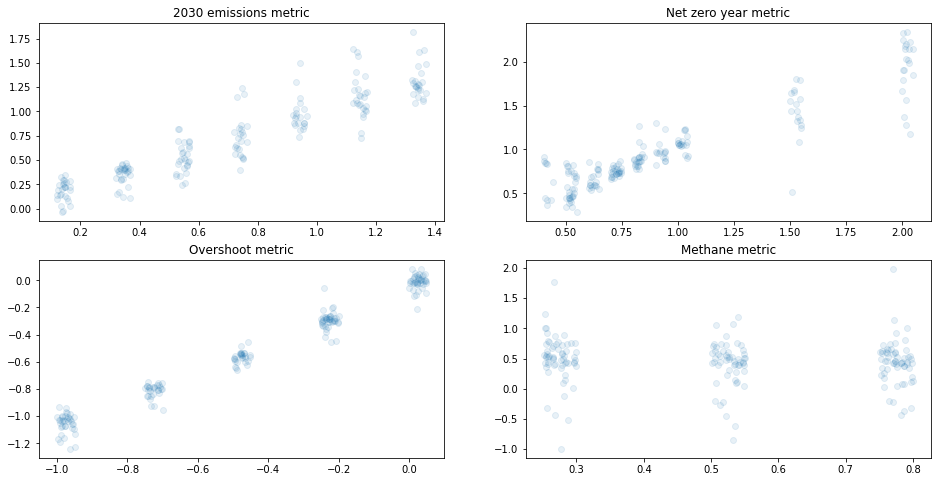

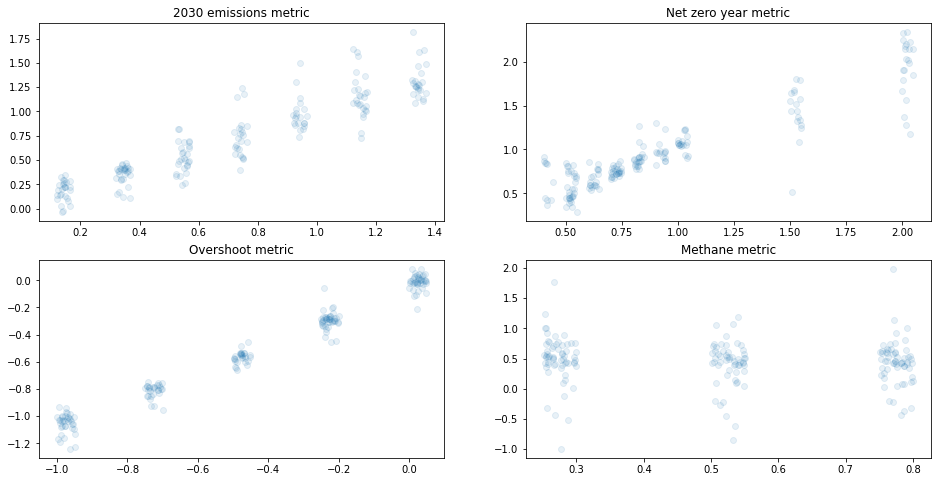

In [149]:
plt.figure(figsize=(16, 8))
corcoefsq5 = []
titles = ["2030 emissions metric", "Net zero year metric", "Overshoot metric", "Methane metric"]
for i in range(4):
    ax=plt.subplot(2, 2, i+1)
    plt.scatter(
        temp_res_test[quant_to_inv].iloc[:, i]+0.05*np.random.rand(len(wrong_quant_results)), 
        wrong_quant_results[:, i], alpha=0.1
    )
    plt.title(titles[i])
    #corcoefsq5.append(np.corrcoef(temp_res_test.iloc[:, i], wrong_quant_results[:, i]))
#corcoefsq5

In [157]:
(all_wrong_fraction, wrong_fraction) = calc_wrong_fraction(wrong_quant_results, mins, maxes)
print(all_wrong_fraction)
print(wrong_fraction)

0.29444444444444445
0    0.122222
1    0.094444
2    0.261111
3    0.316667
dtype: float64
0.29444444444444445
0    0.122222
1    0.094444
2    0.261111
3    0.316667
dtype: float64
